In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

import the train and test datasets

In [ ]:
train_data = pd.read_csv('train housepred.csv')
test_data = pd.read_csv('test housepred.csv')

make a copy of the datasets

In [ ]:
train_original = train_data.copy()
test_original = test_data.copy()

exploring the five rows of train data. 

In [ ]:

print(train_data.shape)
train_data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

exploring the five rows of test data

In [ ]:
print(test_data.shape)
test_data.head()

(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

### Data Cleaning 

checking duplicates 

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
test_data.duplicated().sum()

0

checking missing values

In [ ]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Visualization to missing value exploration

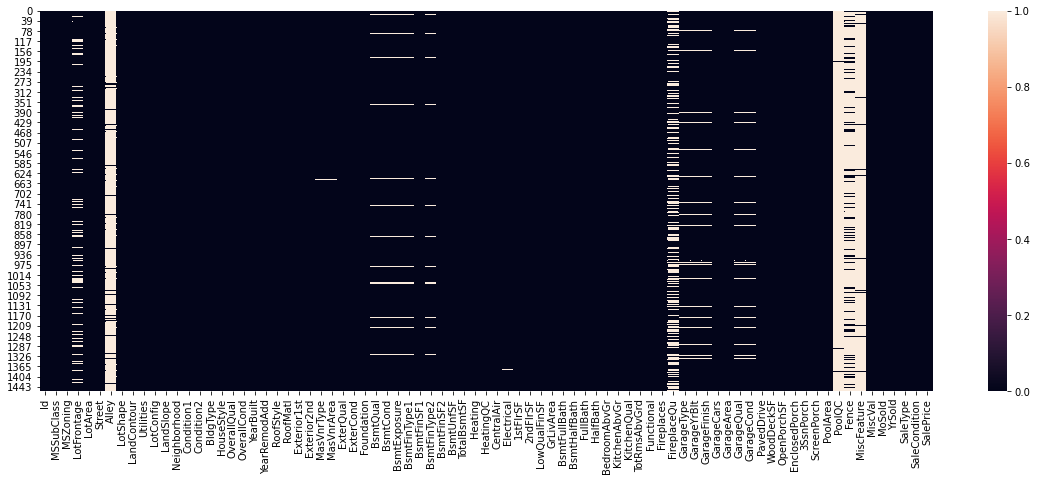

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_data.isnull())

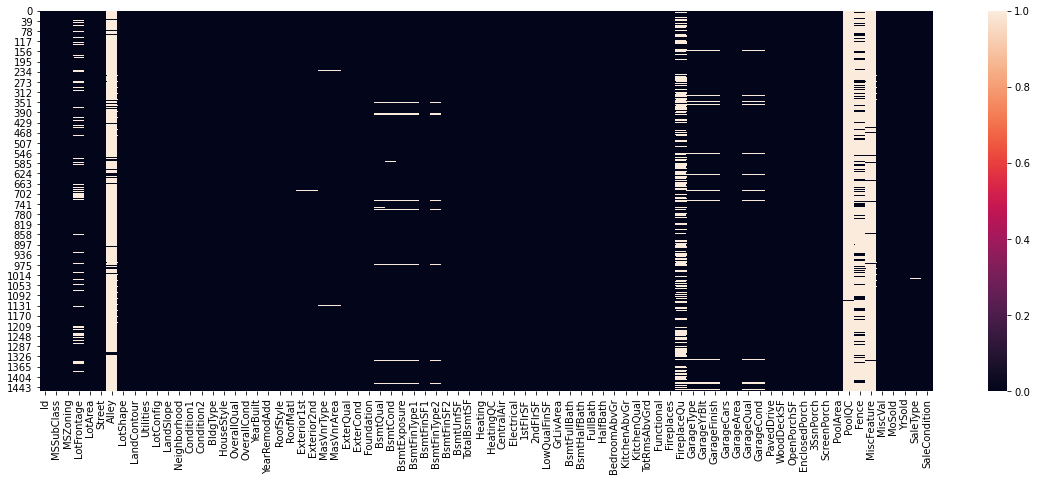

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(test_data.isnull())

In [ ]:
all_null_values = (train_data.isnull().sum() / len(train_data)) * 100
null_values_grter_50_percent = all_null_values.drop(all_null_values[all_null_values < 50.0].index)
all_null_values = round(null_values_grter_50_percent.sort_values(ascending=False), 2)
missing_data = pd.DataFrame({'Percente of null values(train)' :all_null_values})
missing_data.head(100)

Percente of null values(train)
PoolQC                                99.52
MiscFeature                           96.30
Alley                                 93.77
Fence                                 80.75

In [ ]:
all_null_values = (test_data.isnull().sum()/len(test_data)) * 100
null_values_grter_50_percent = all_null_values.drop(all_null_values[all_null_values < 50.0].index)
all_null_values = round(null_values_grter_50_percent.sort_values(ascending=False), 2)
missing_data = pd.DataFrame({'Percente of null values(test)' :all_null_values})
missing_data.head(100)

Percente of null values(test)
PoolQC                               99.79
MiscFeature                          96.50
Alley                                92.67
Fence                                80.12
FireplaceQu                          50.03

drop columns with more that 50% missing values 

In [ ]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [ ]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  868
total missing in test data:  885


fill the remaining missing with median 

In [ ]:
train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())

In [ ]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  520
total missing in test data:  555


In [ ]:
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [ ]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  0
total missing in test data:  0


### EDA

In [ ]:
categorical_df = train_data.select_dtypes(include=['object'])
print(categorical_df.shape)
categorical_df.head()

(1460, 38)


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [ ]:
numerical_df = train_data.select_dtypes(exclude=['object'])
print(numerical_df.shape)
numerical_df.head()

(1460, 38)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

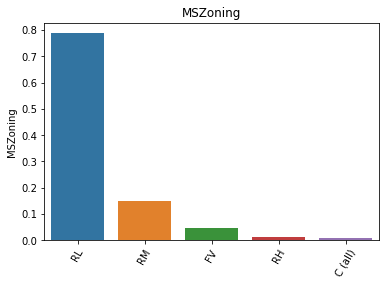

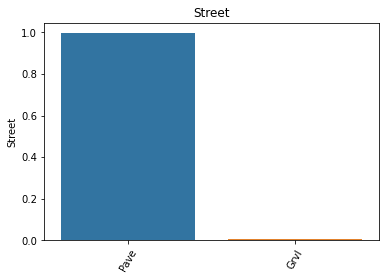

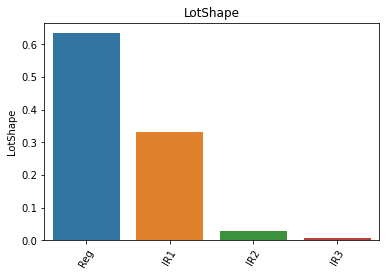

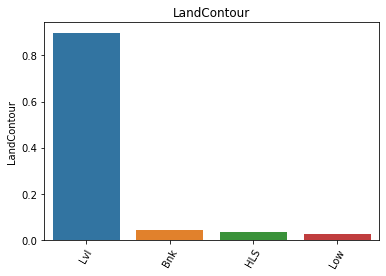

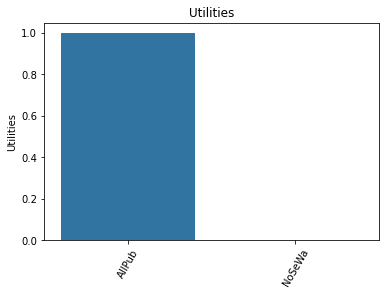

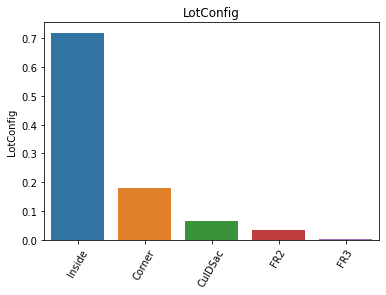

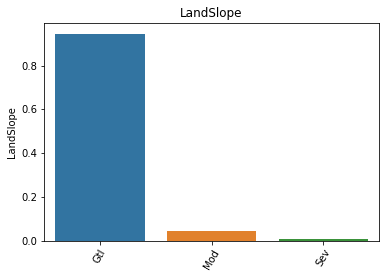

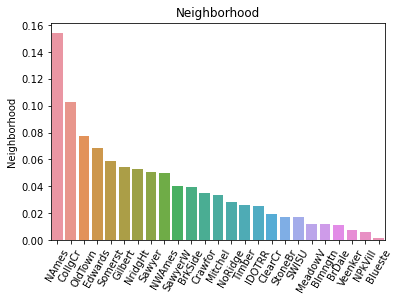

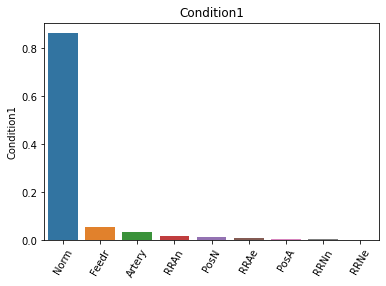

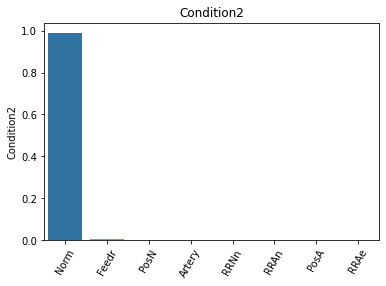

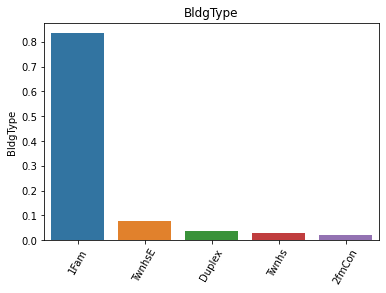

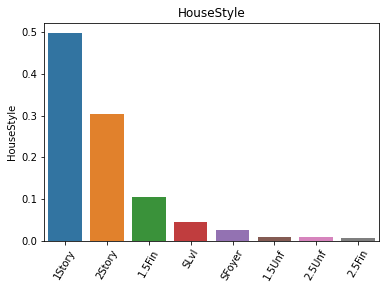

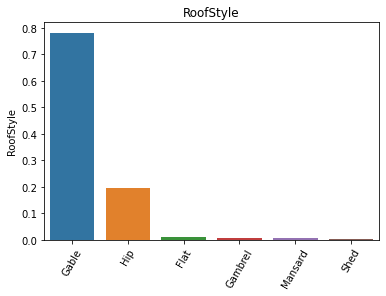

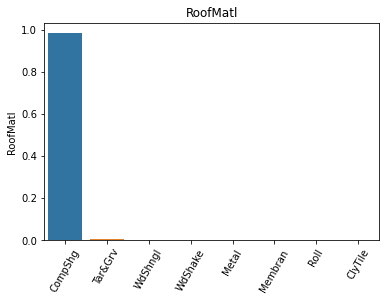

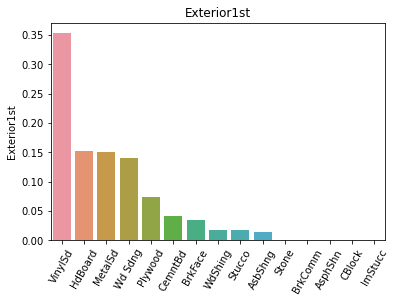

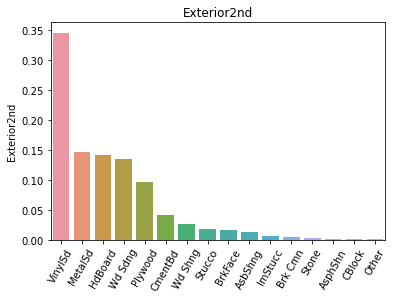

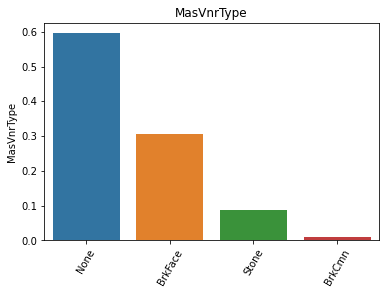

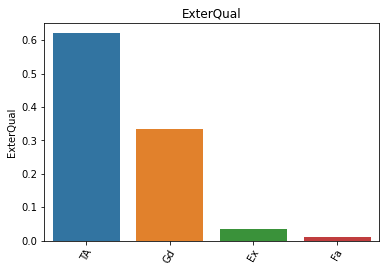

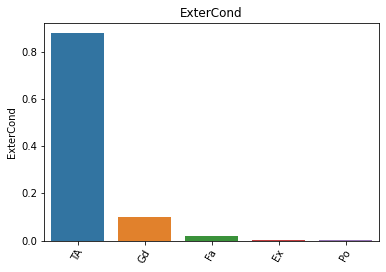

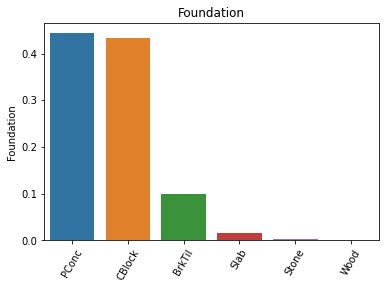

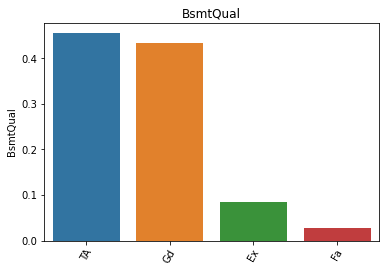

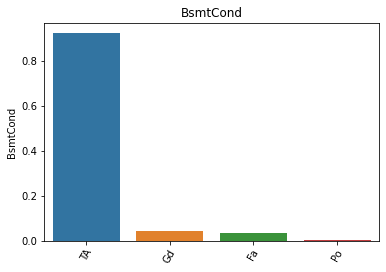

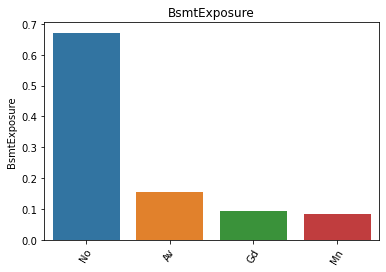

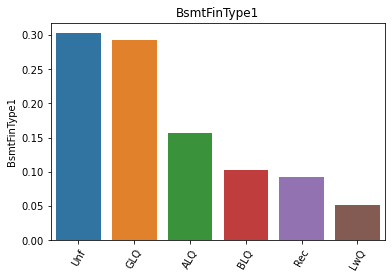

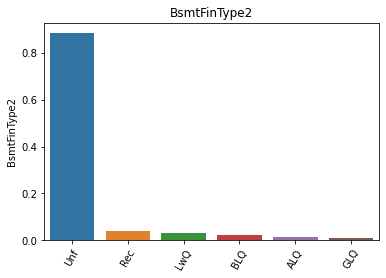

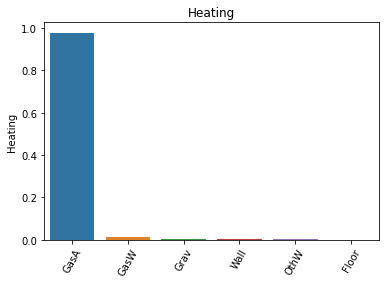

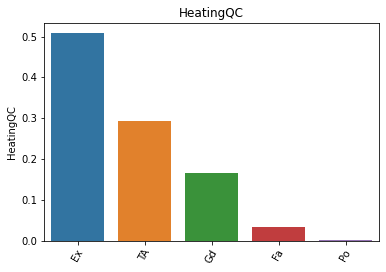

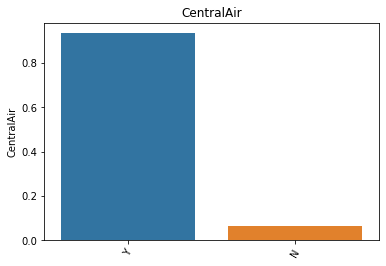

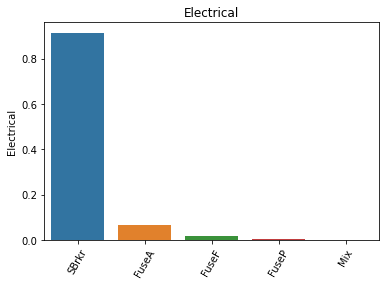

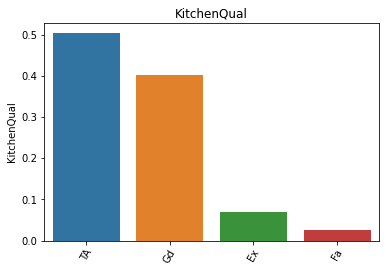

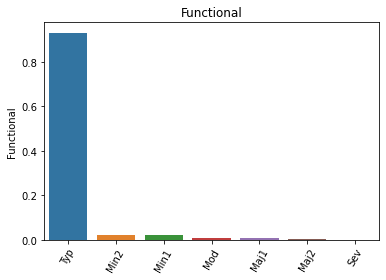

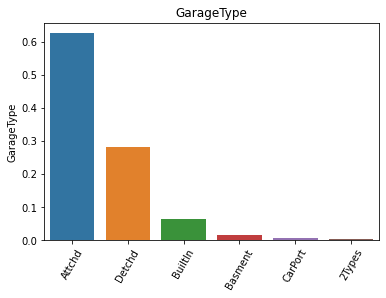

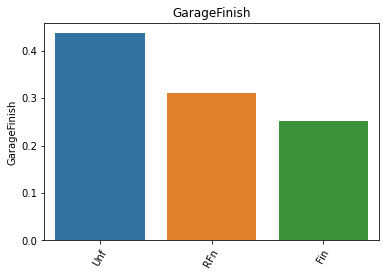

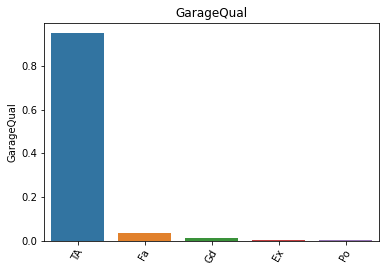

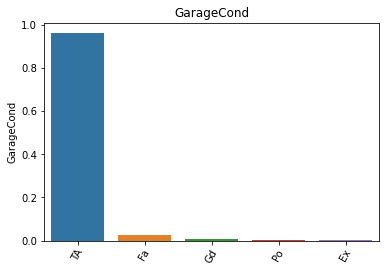

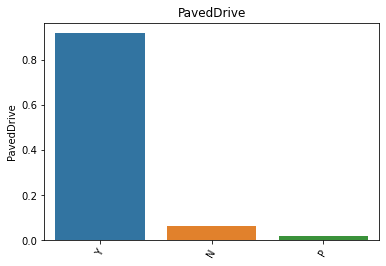

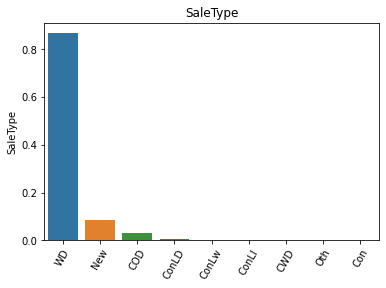

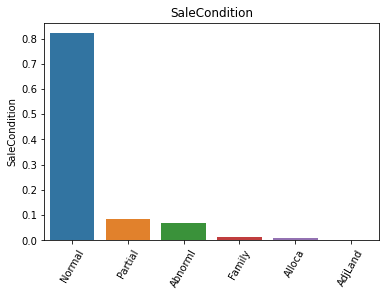

In [ ]:

def bar():
    fig =  plt.subplots()
    for feature in categorical_df:
        cat = train_data[feature].value_counts(normalize=True) # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 60)

        plt.title(feature)
        plt.show()
bar()

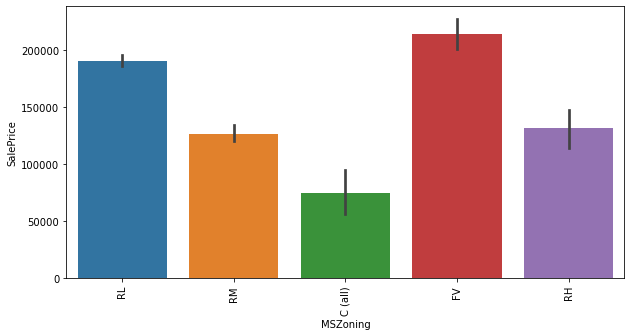

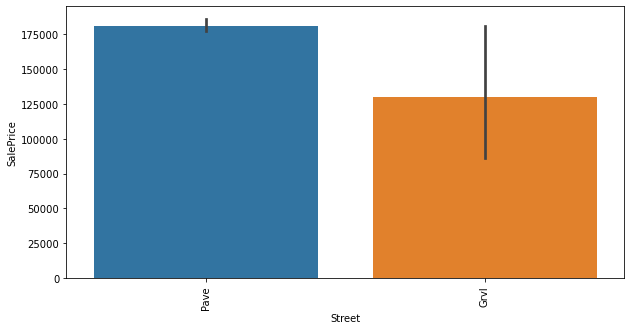

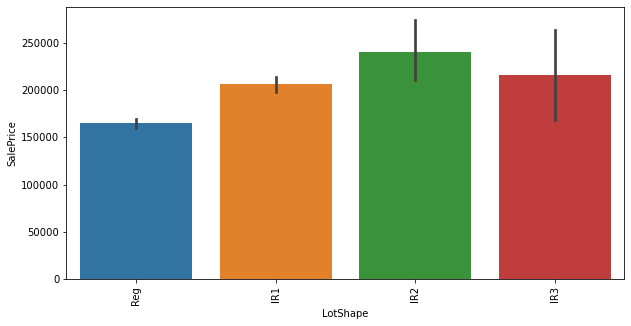

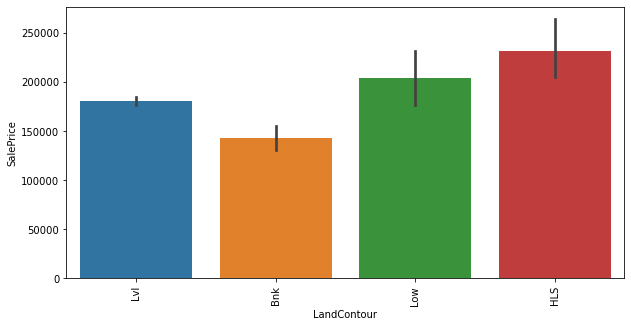

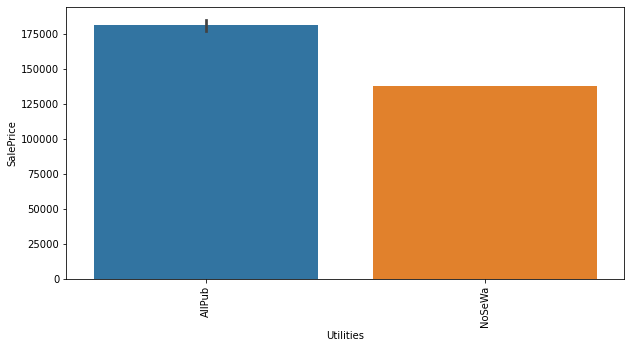

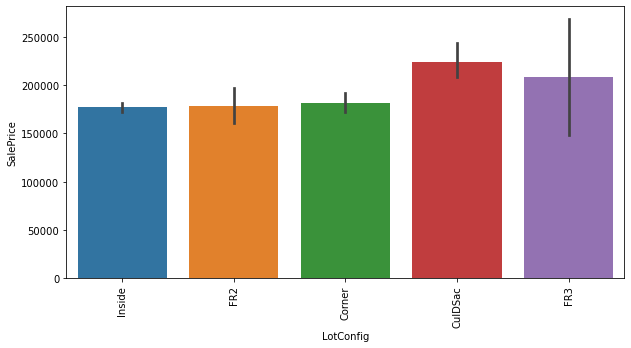

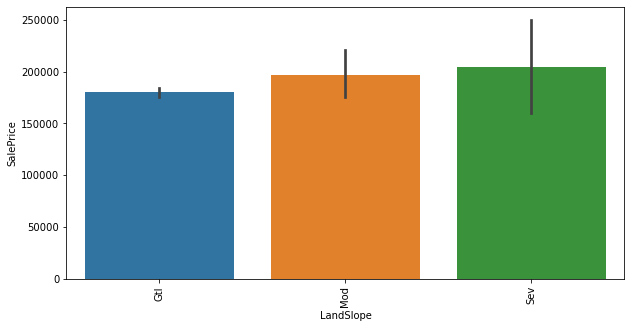

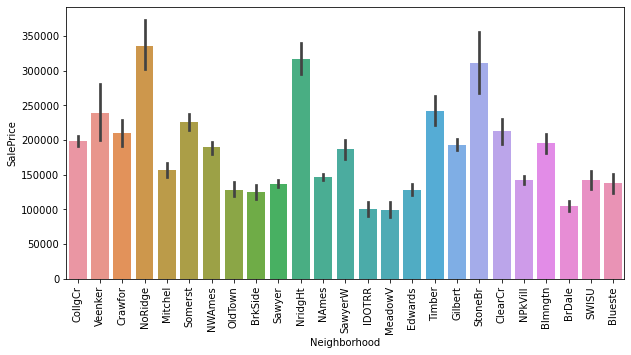

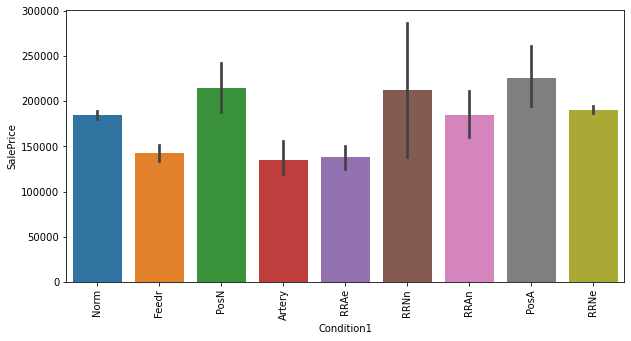

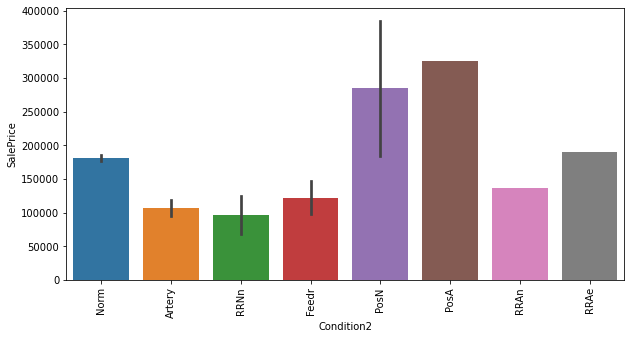

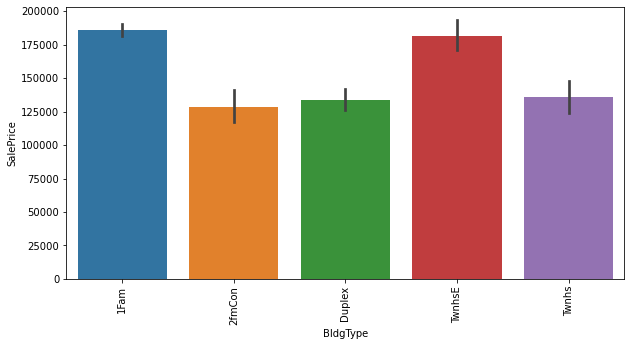

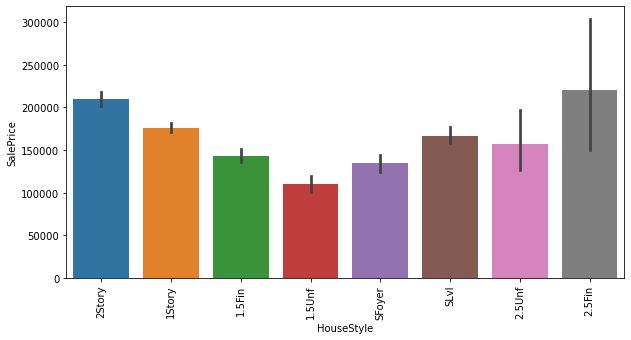

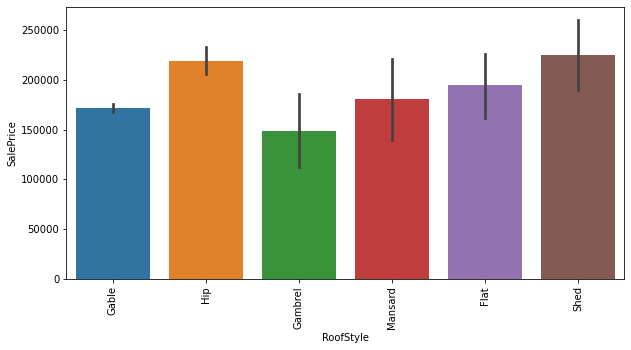

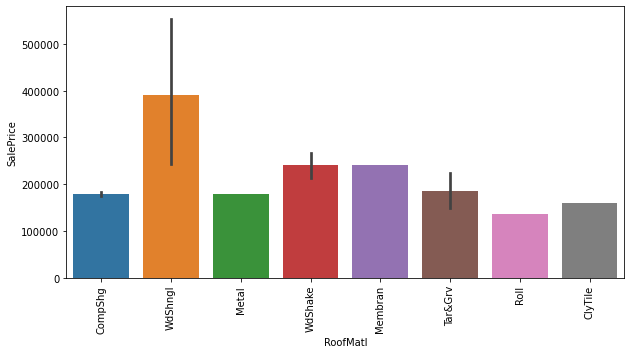

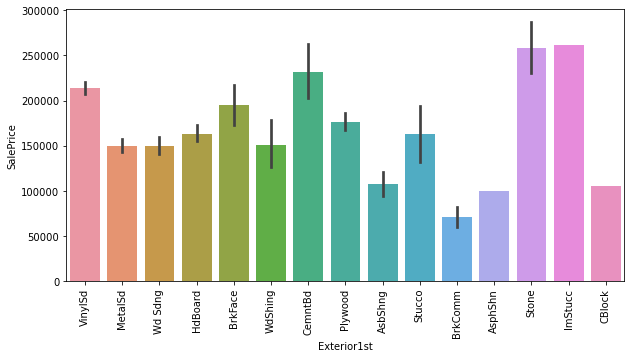

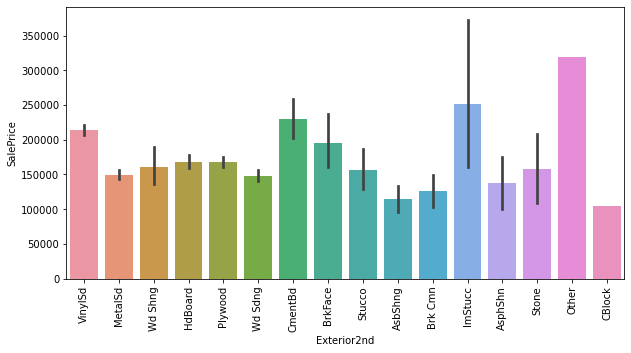

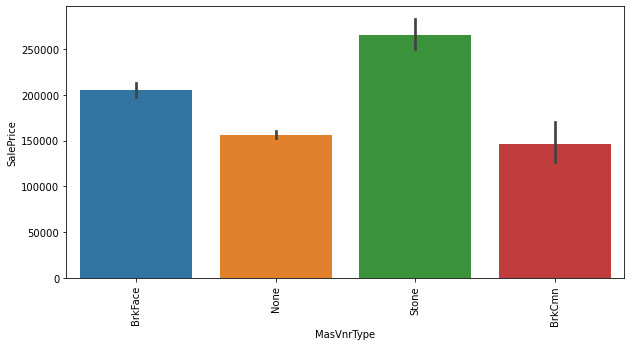

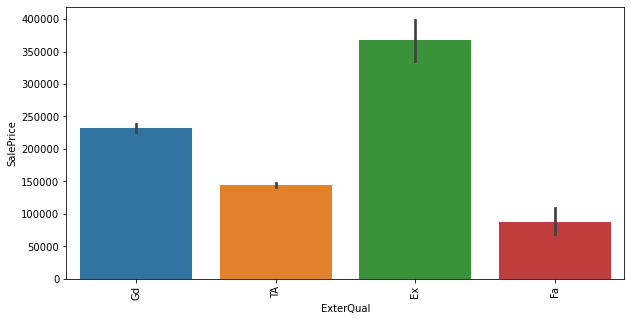

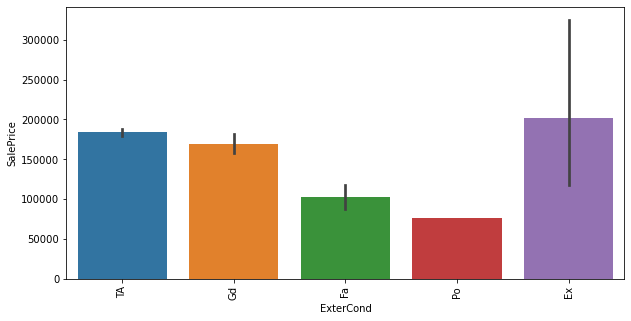

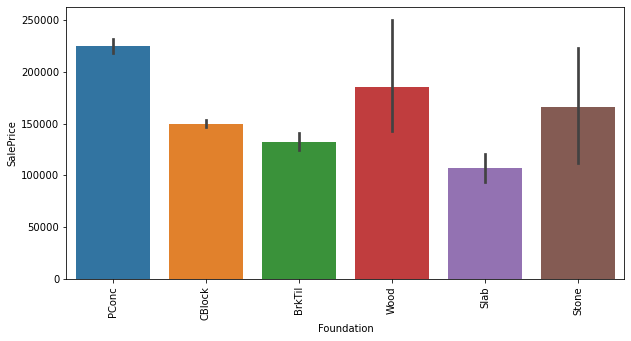

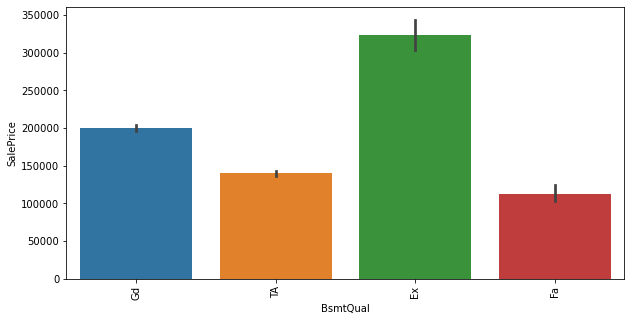

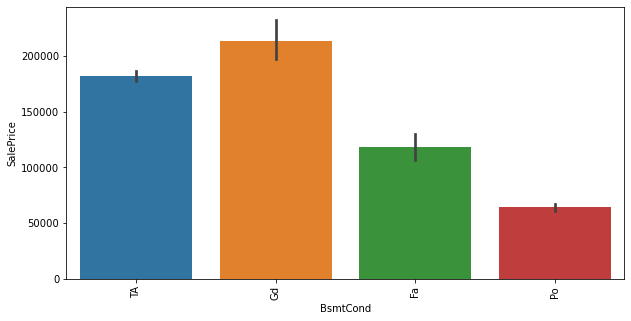

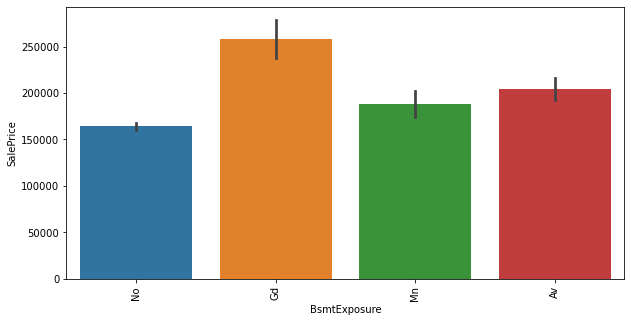

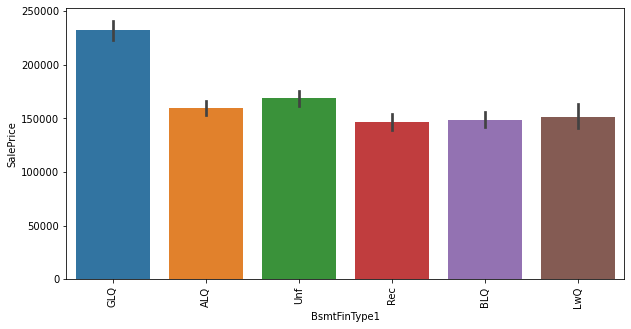

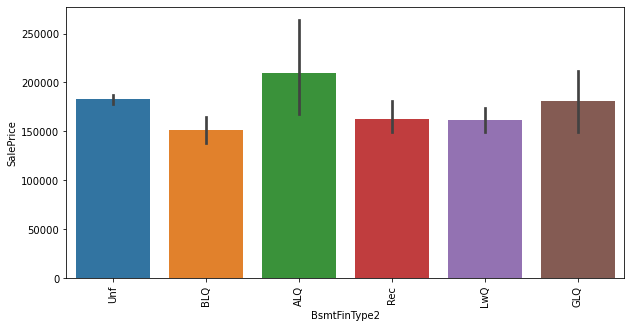

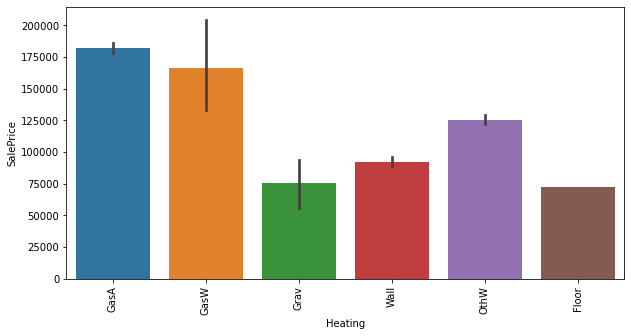

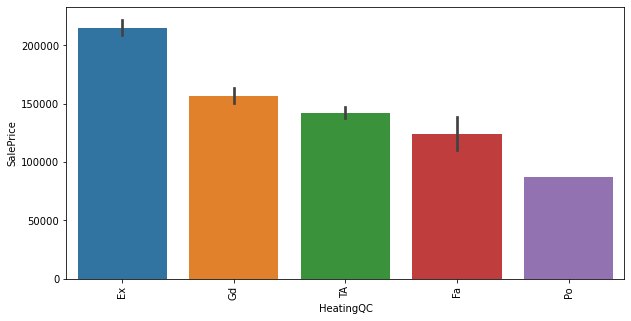

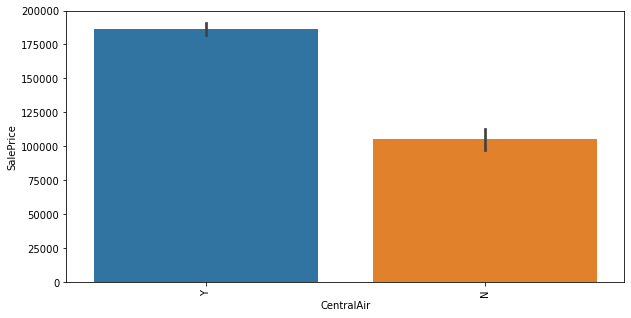

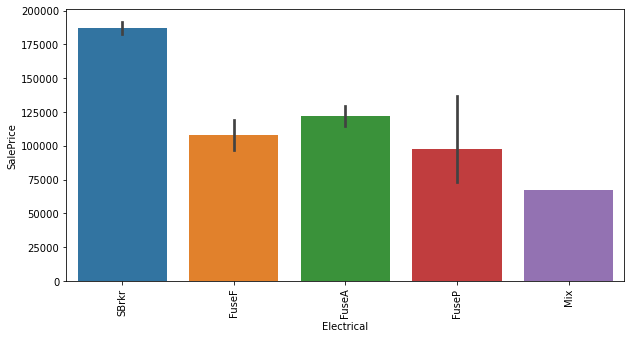

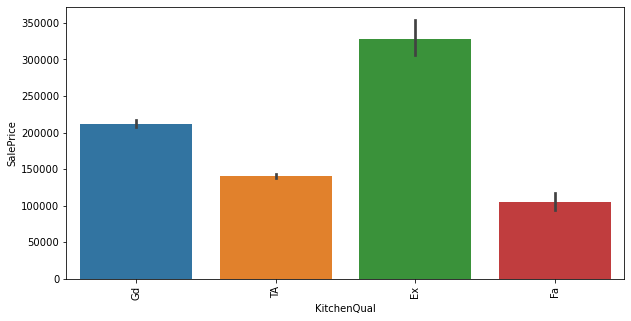

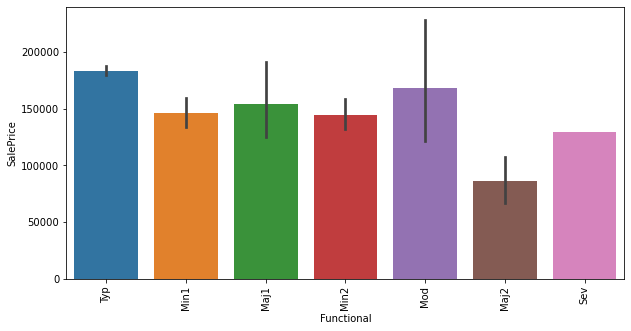

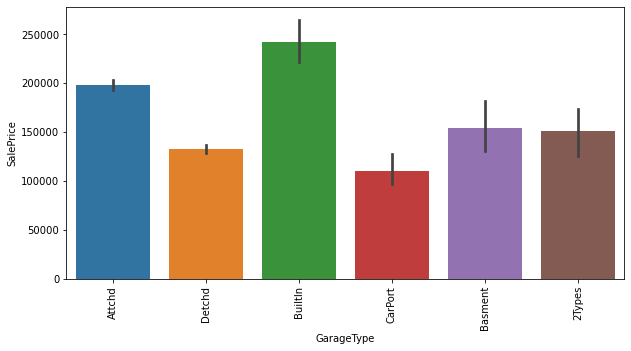

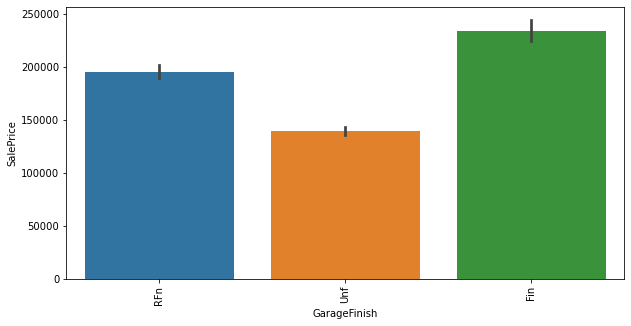

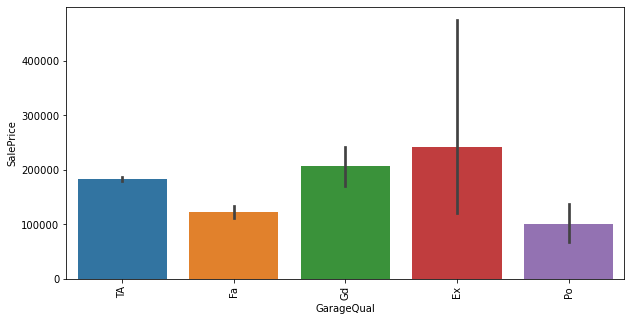

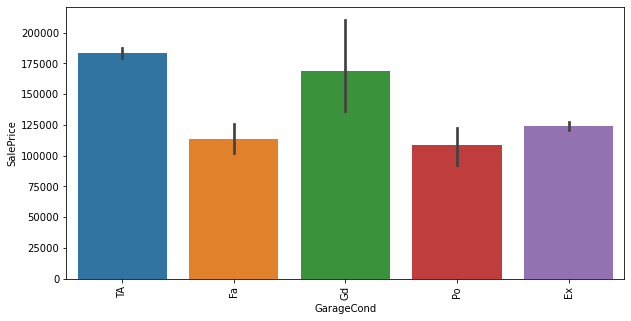

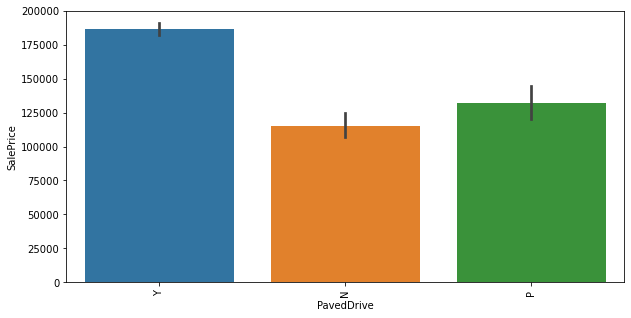

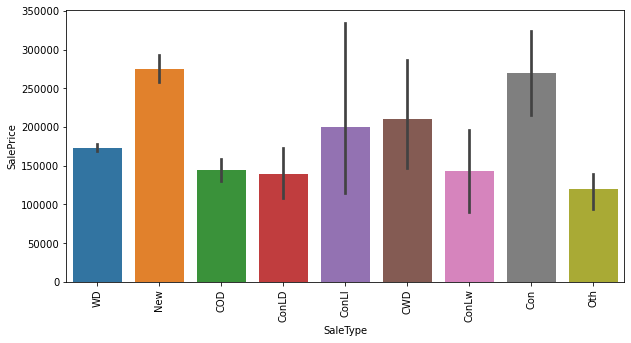

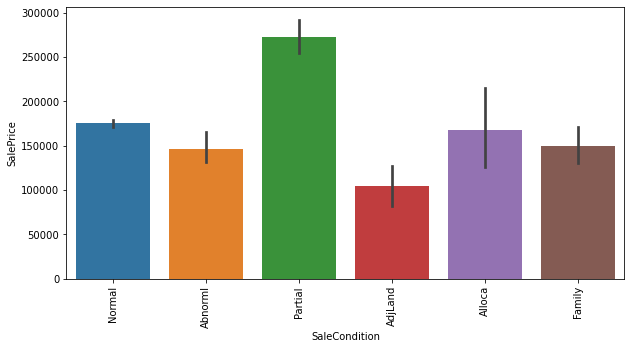

In [ ]:
target = train_data.SalePrice
for col in categorical_df.columns:
    plt.figure(figsize=(10, 5))
    cat_feat = train_data[col]
    sns.barplot(x=cat_feat, y=target)
    plt.xticks(rotation=90)
    

Comparative Bar graphs

In [ ]:
categorical_df['SalePrice']=train_data.SalePrice
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
bins = [0,130000,163000,214000,755000]
group=['Low','Average','High', 'Very High'] 
categorical_df['price_cat'] = pd.cut(categorical_df['SalePrice'], bins, labels=group)
categorical_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  SalePrice  \
0         TA         TA          Y       WD        Normal     208500   
1         TA         TA          Y       WD        Normal     181500   
2         TA         TA          Y       WD        Normal     223500   
3         TA         TA          Y       WD       Abnorml     140000   
4         TA         TA          Y       WD        Normal     250000   

   price_cat  
0       High  
1       High  
2  Very High  
3    Average  
4  Very High

In [ ]:
categorical_df_1 = categorical_df.drop(['SalePrice','price_cat'], 1)
price_cat = categorical_df.price_cat

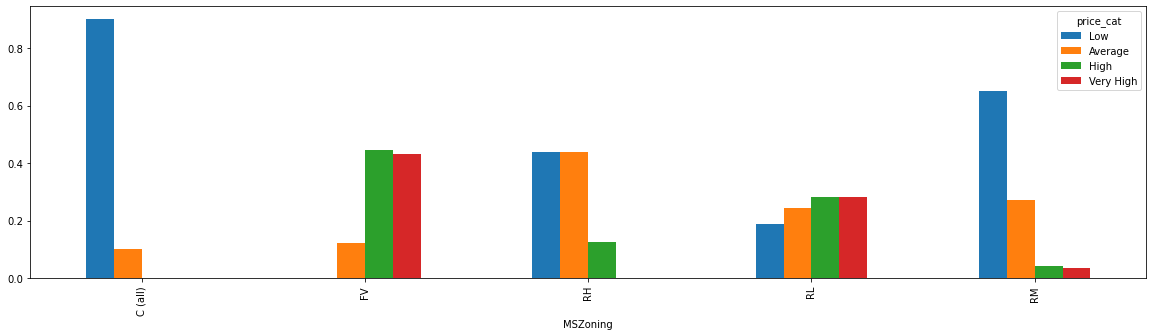

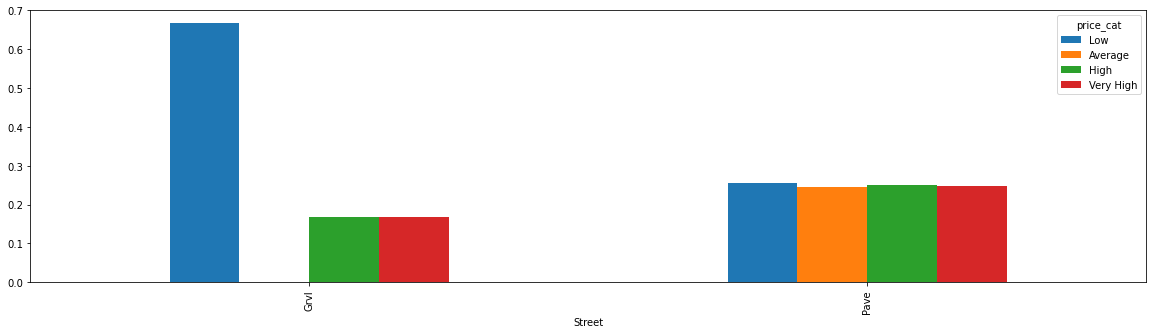

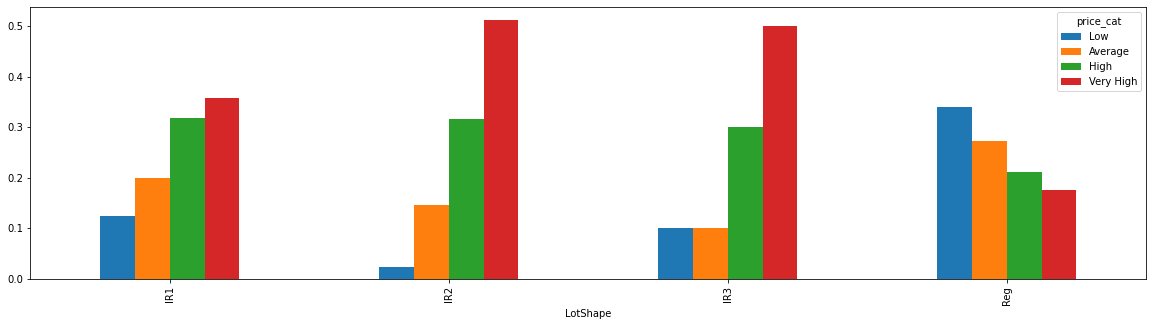

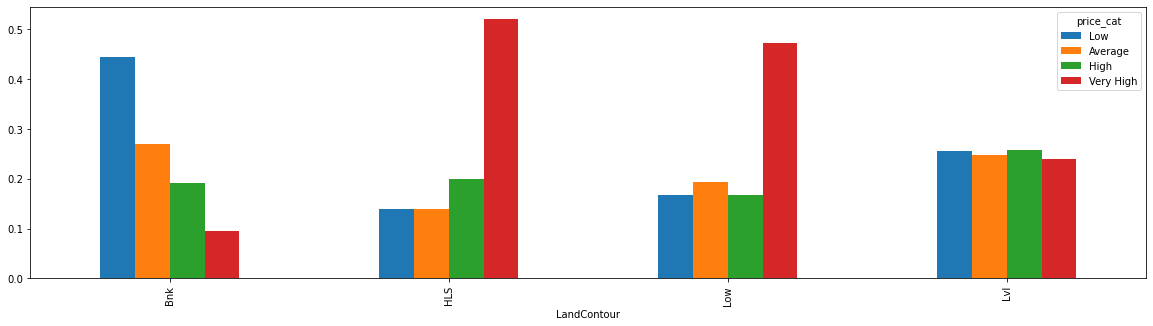

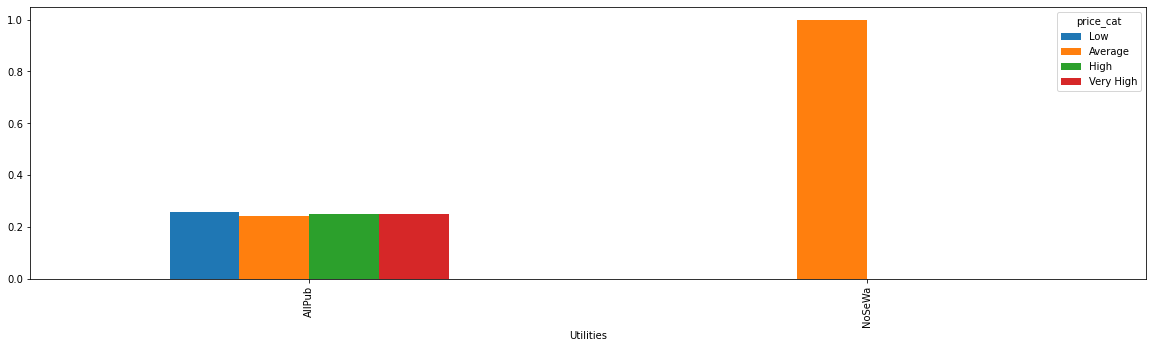

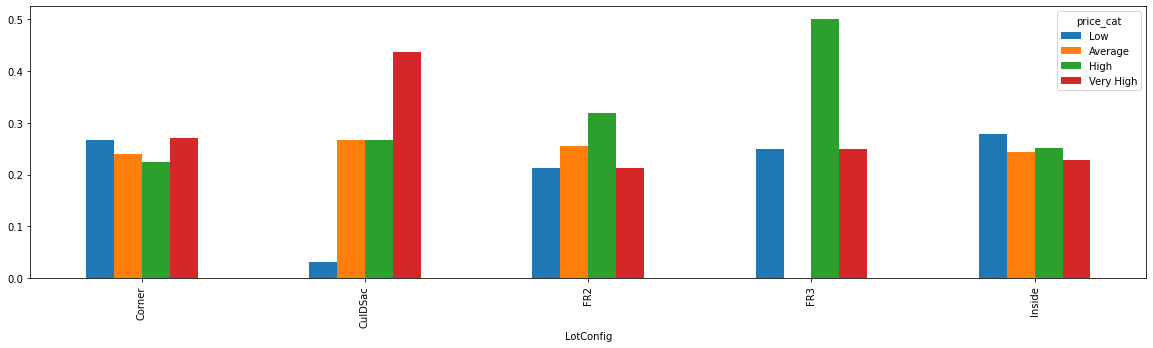

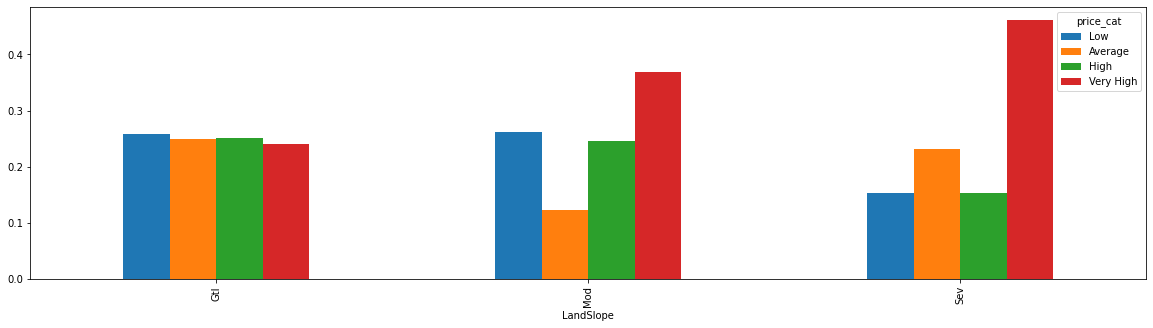

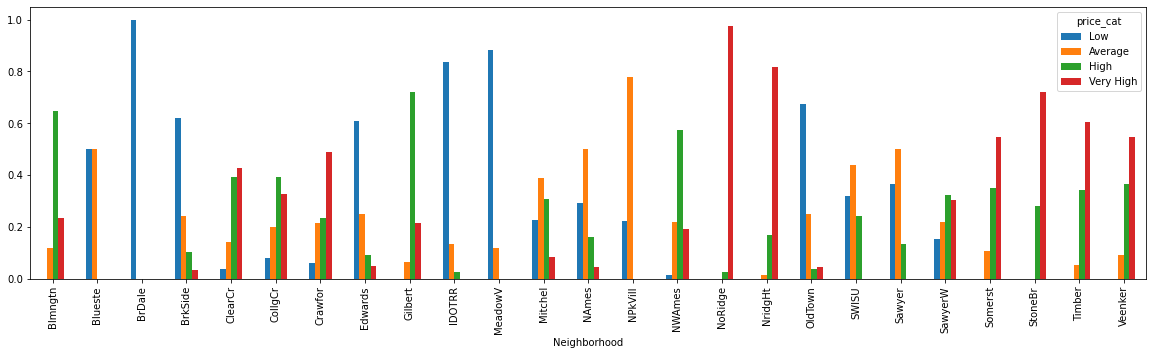

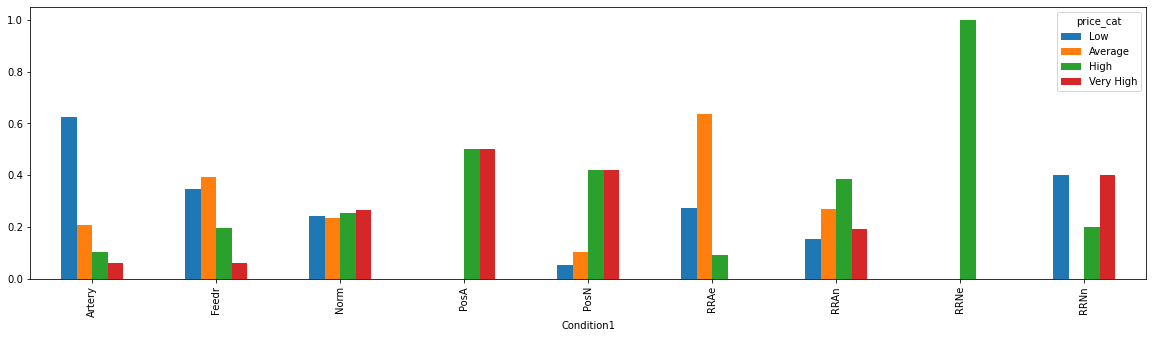

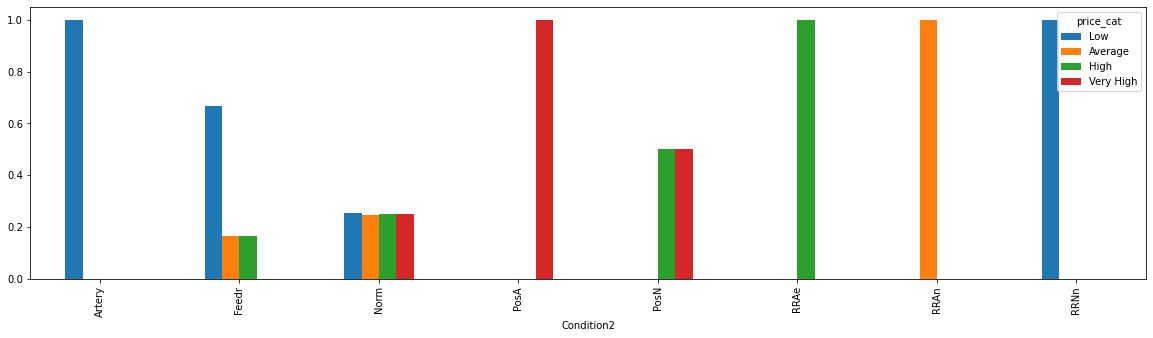

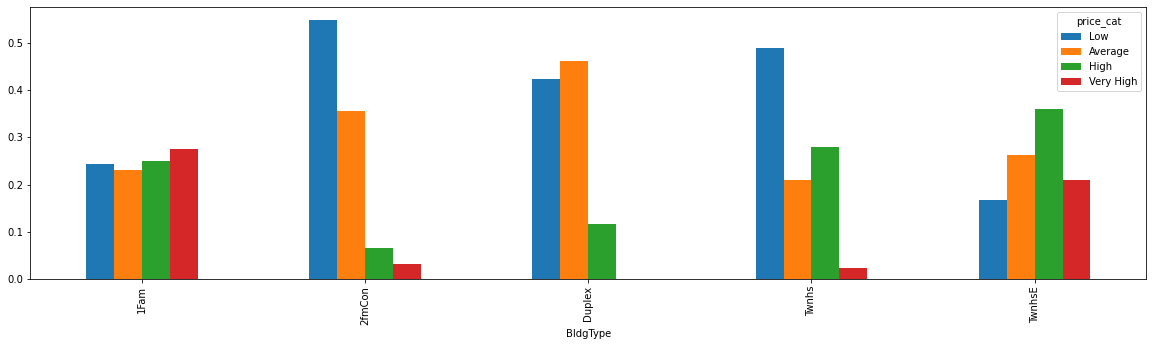

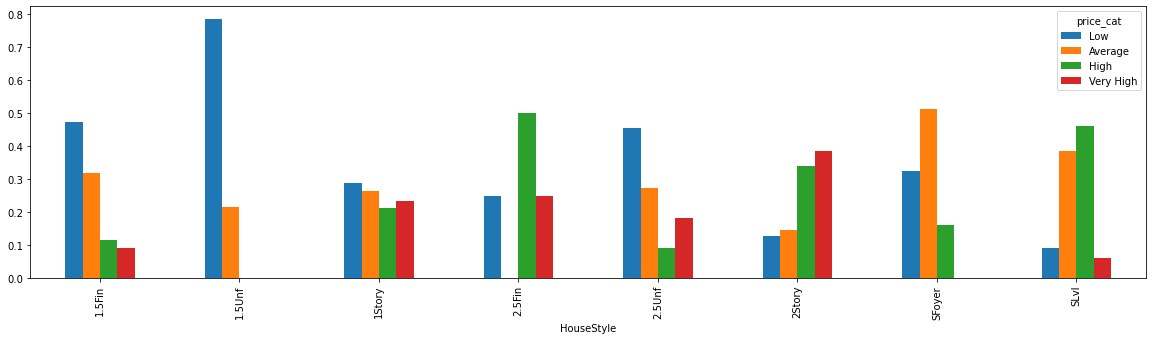

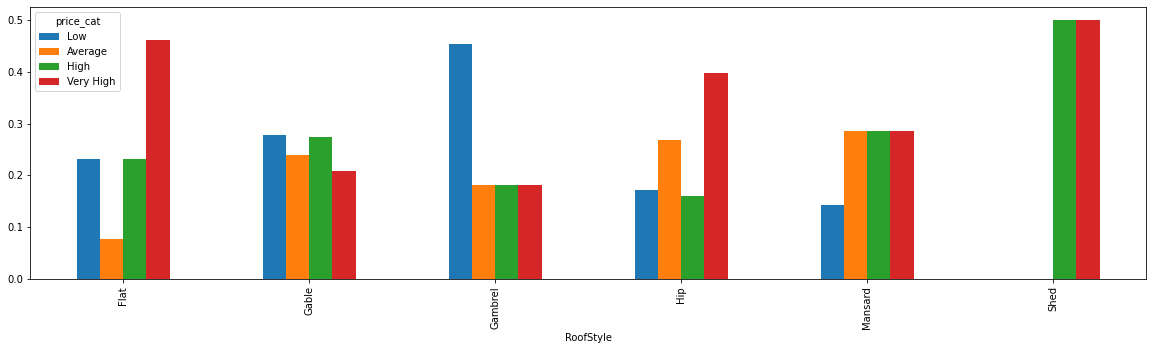

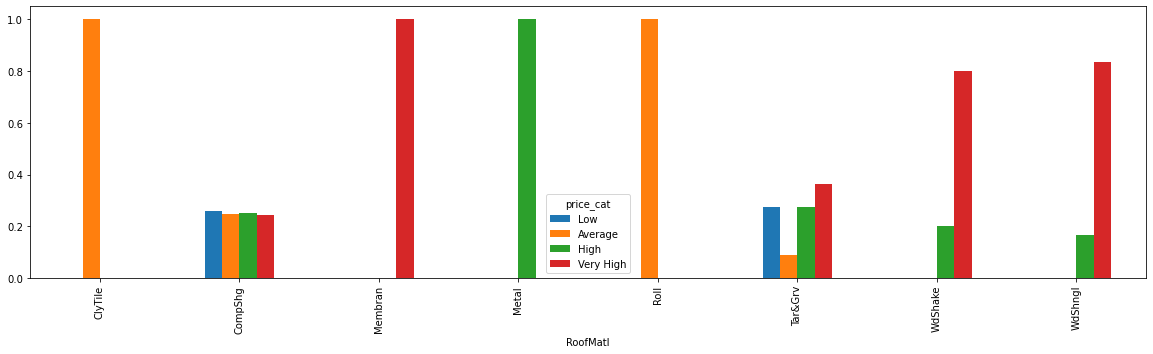

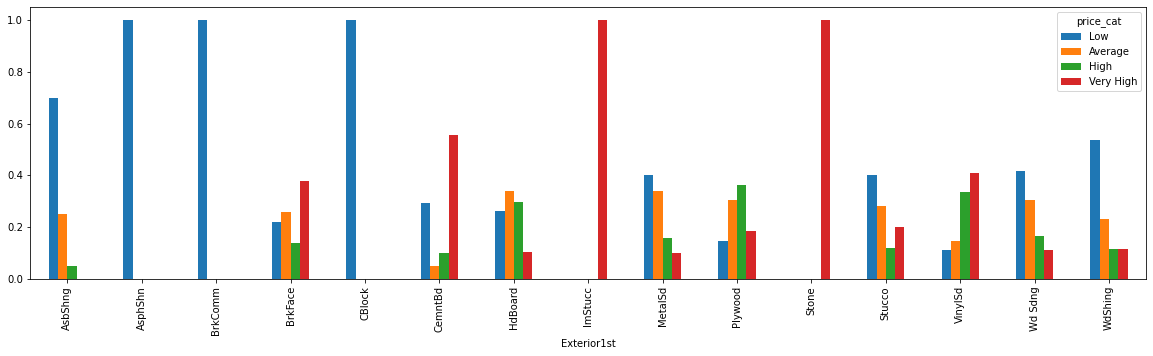

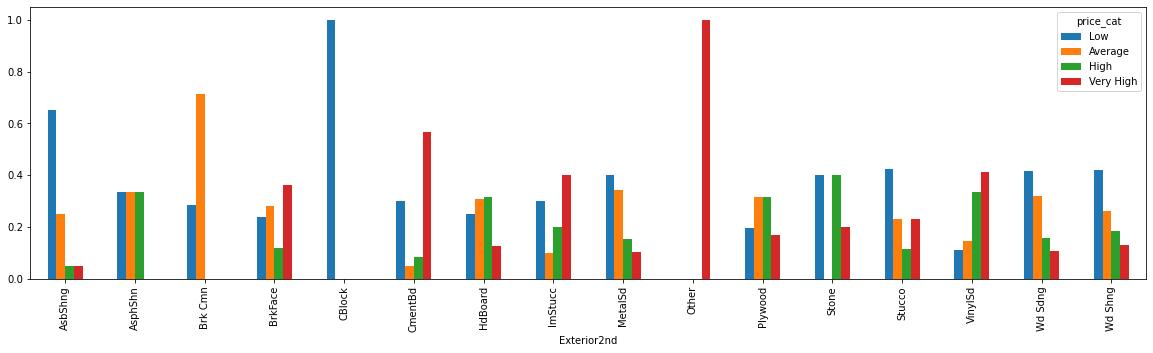

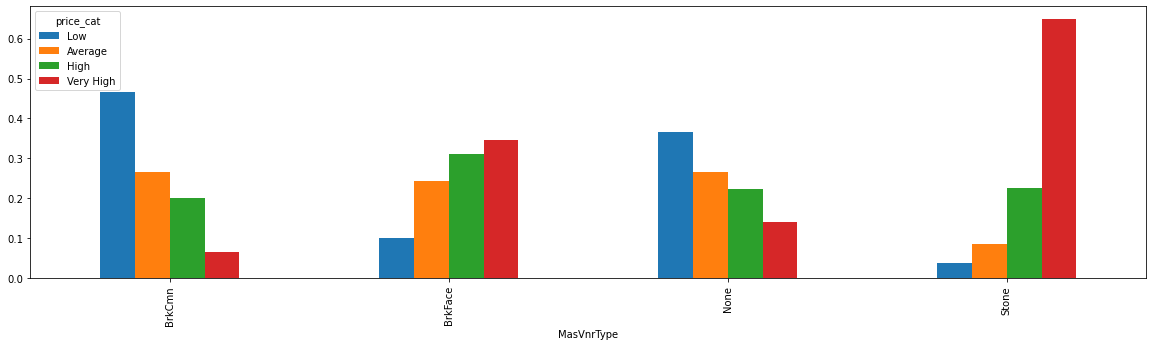

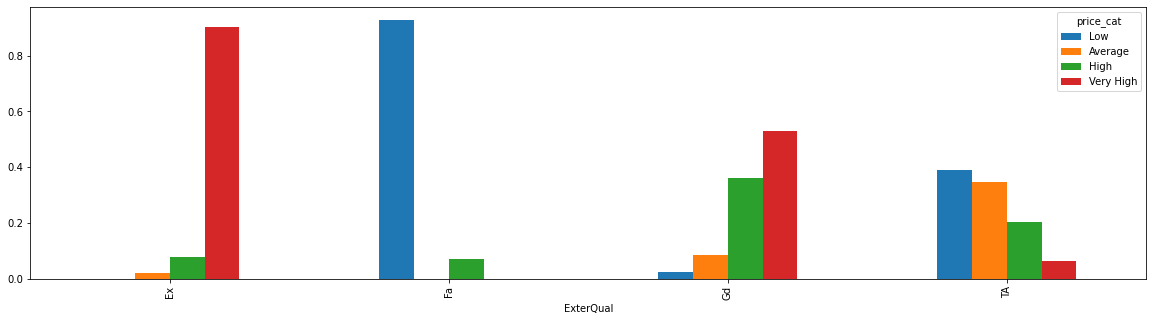

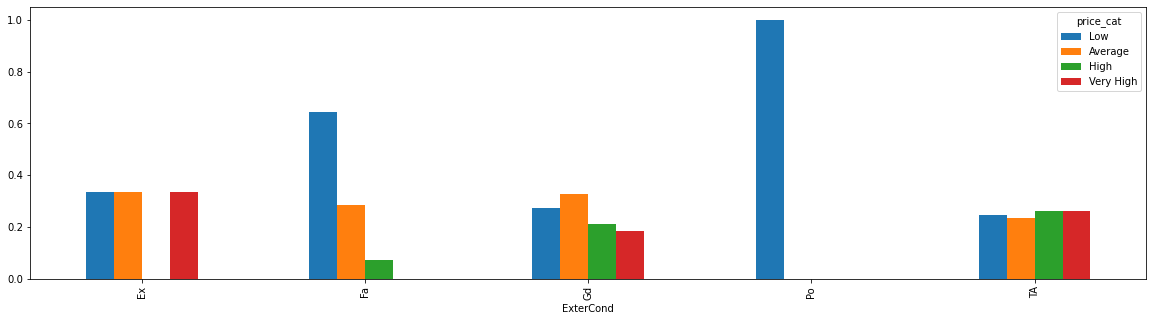

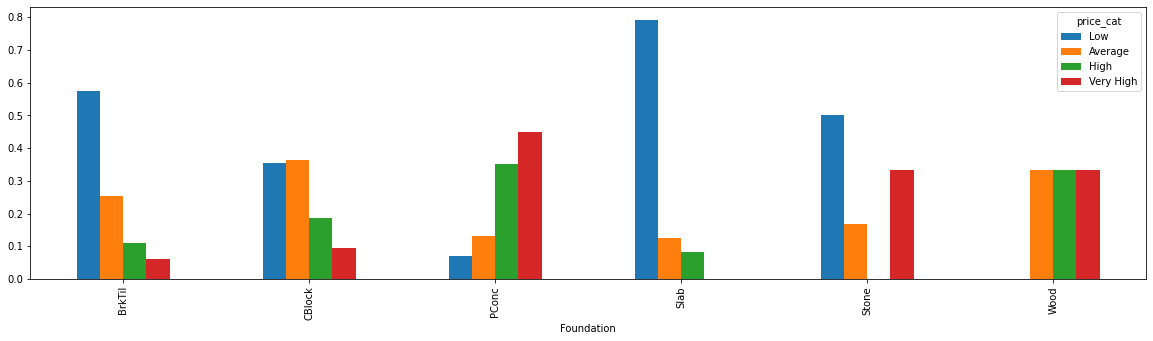

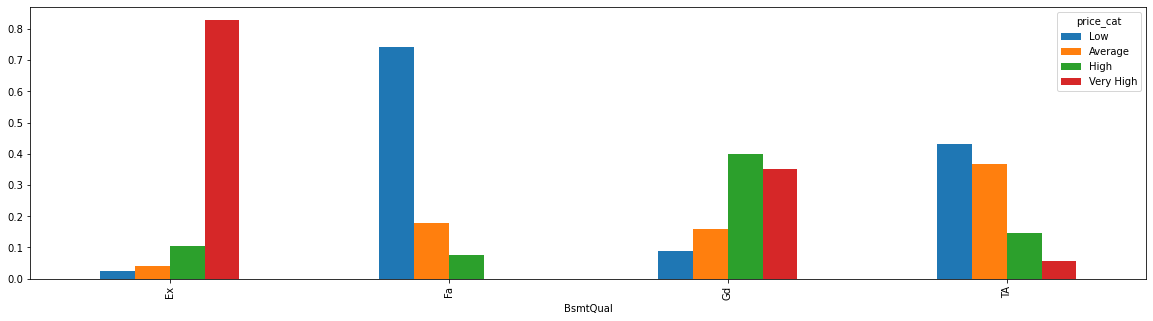

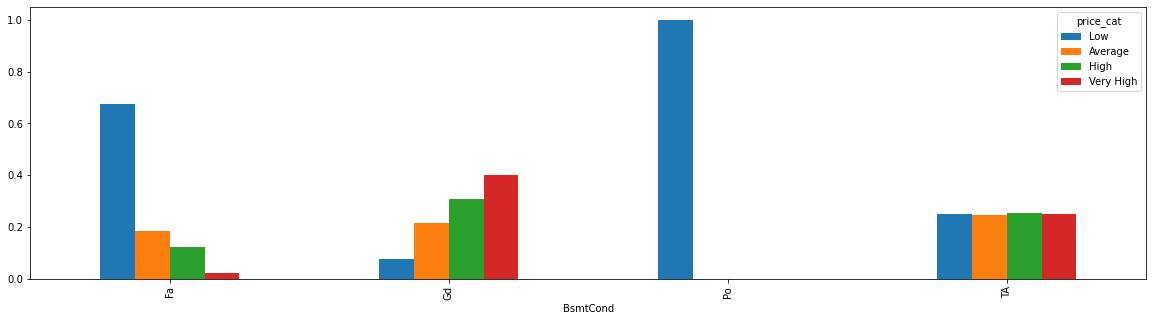

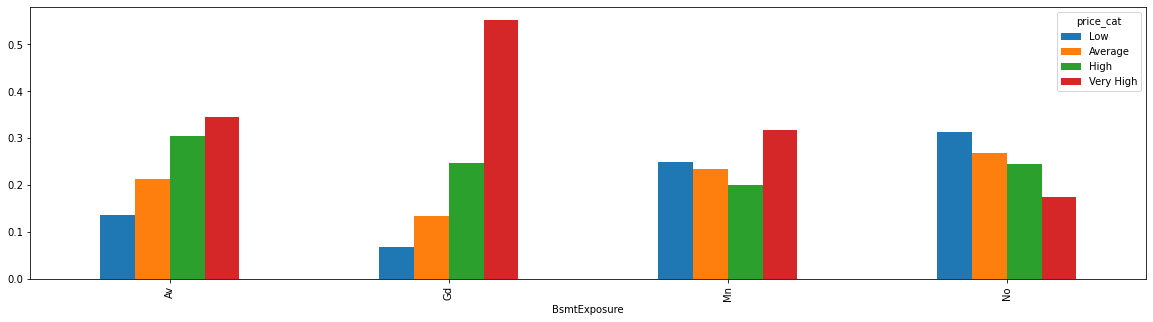

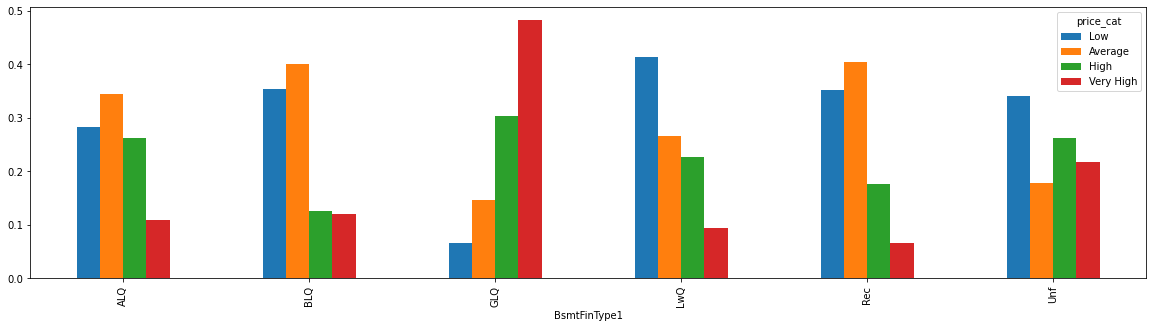

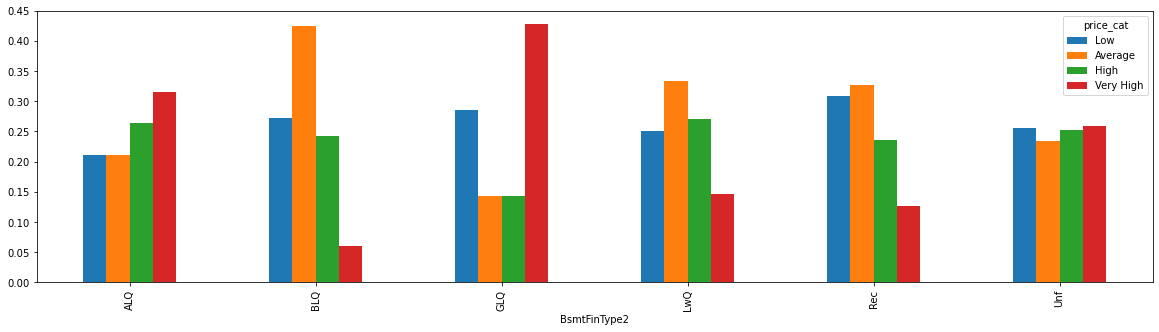

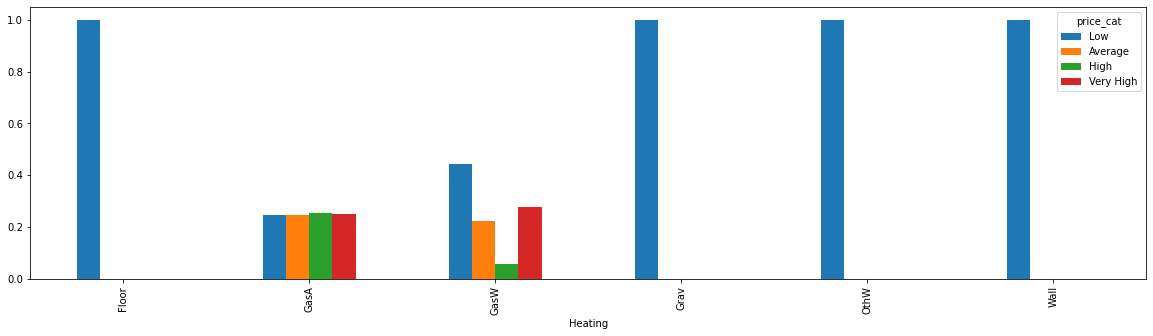

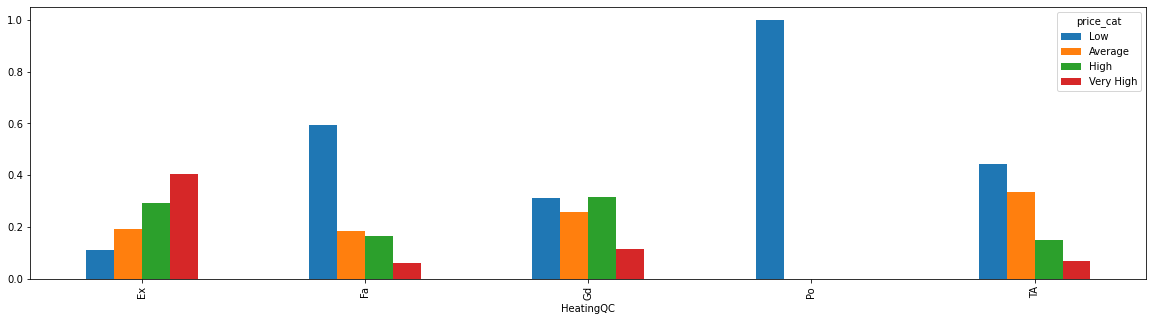

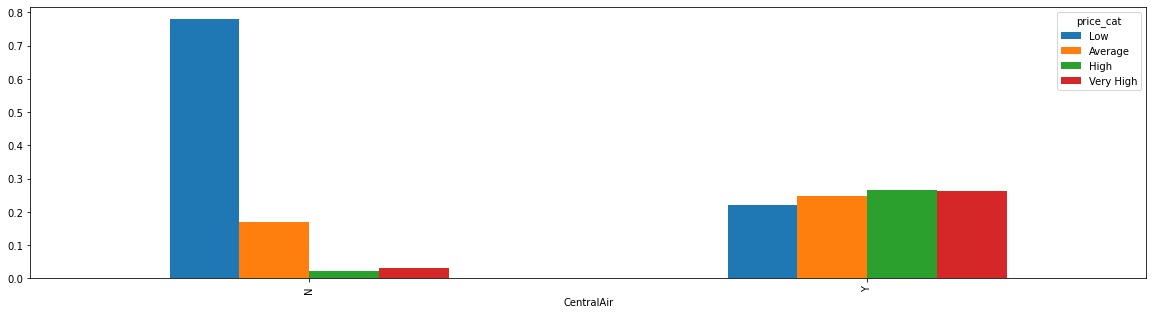

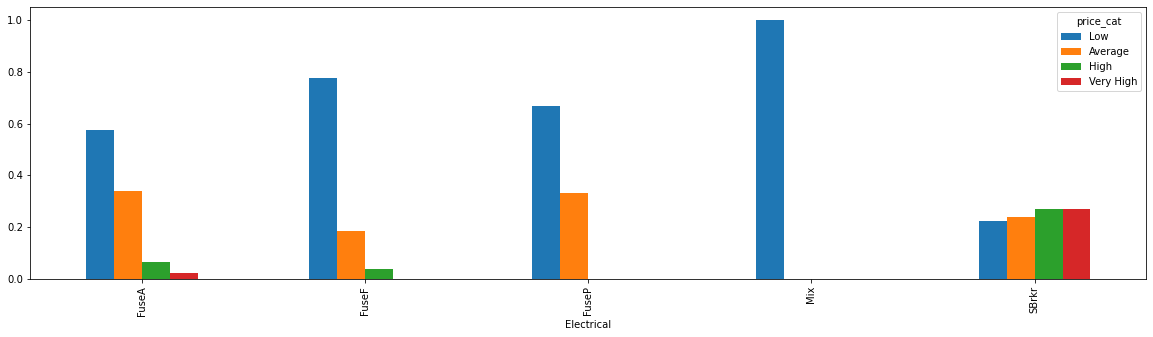

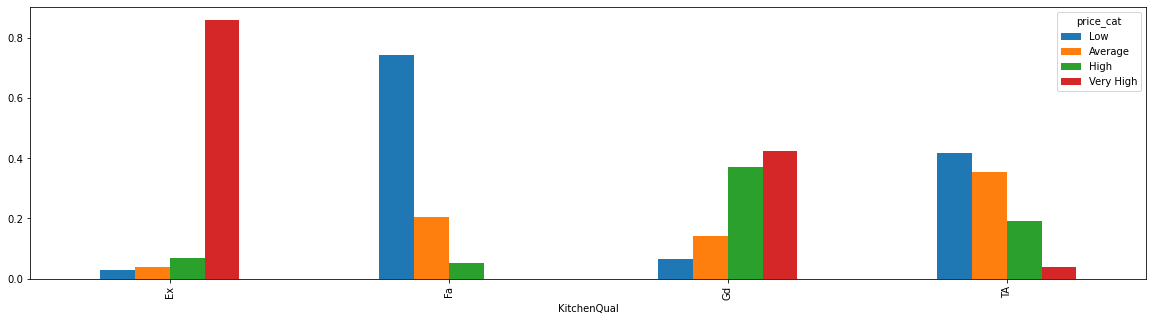

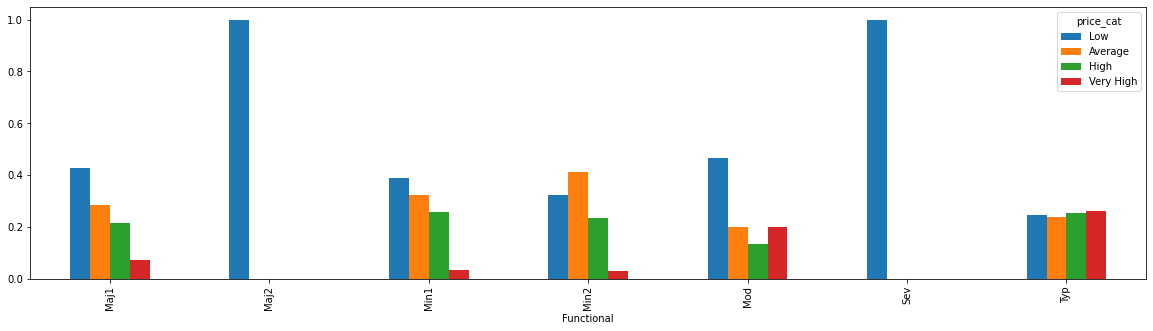

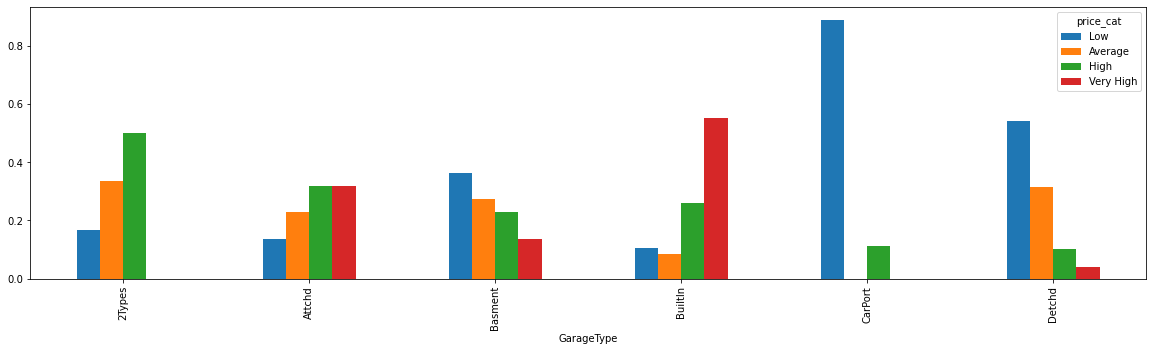

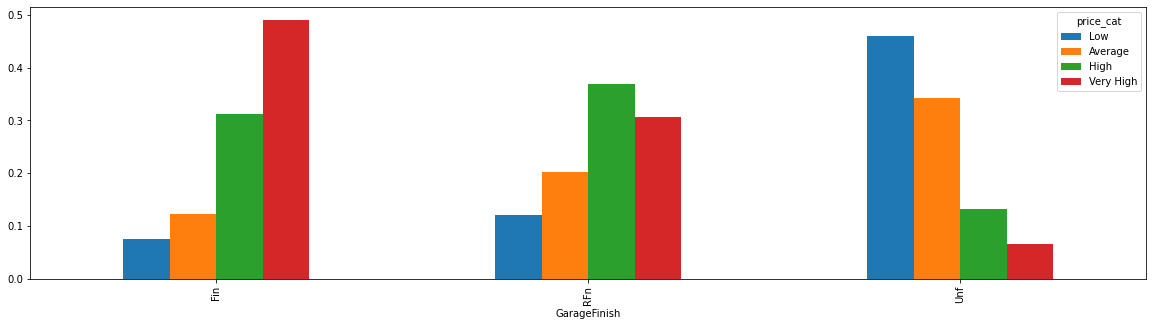

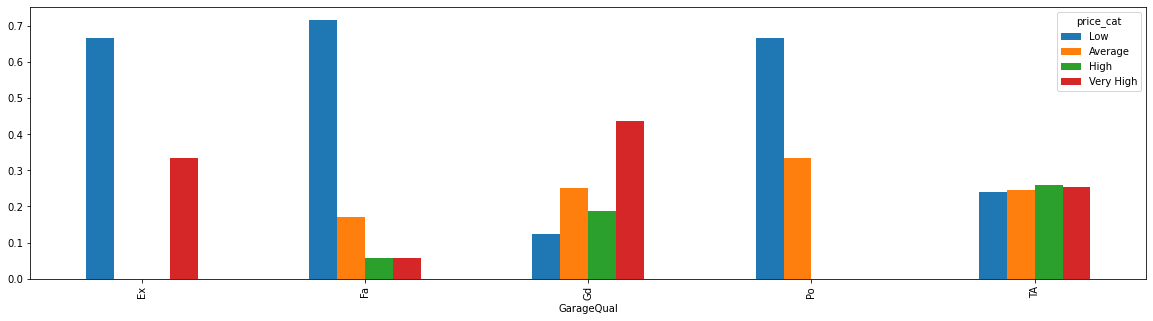

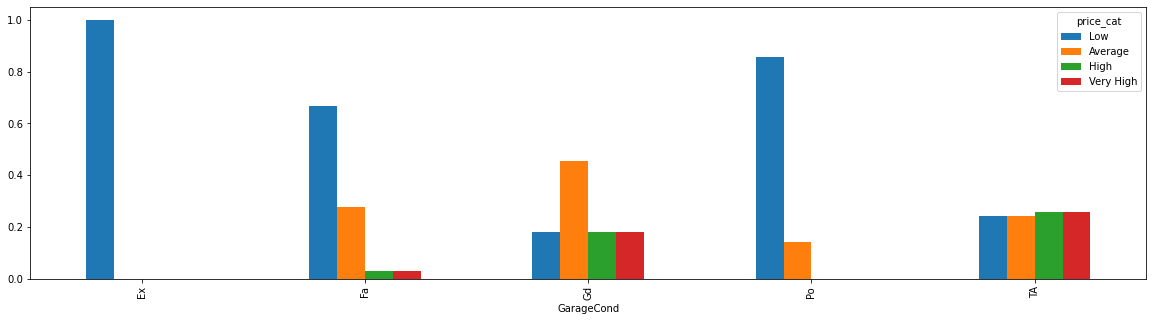

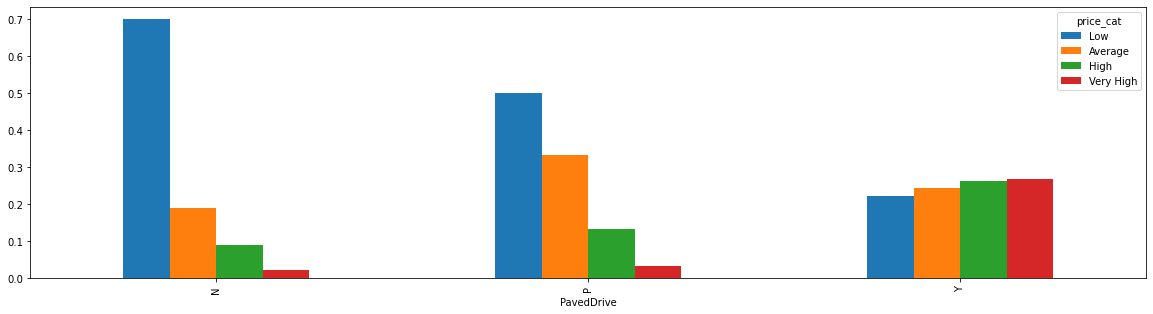

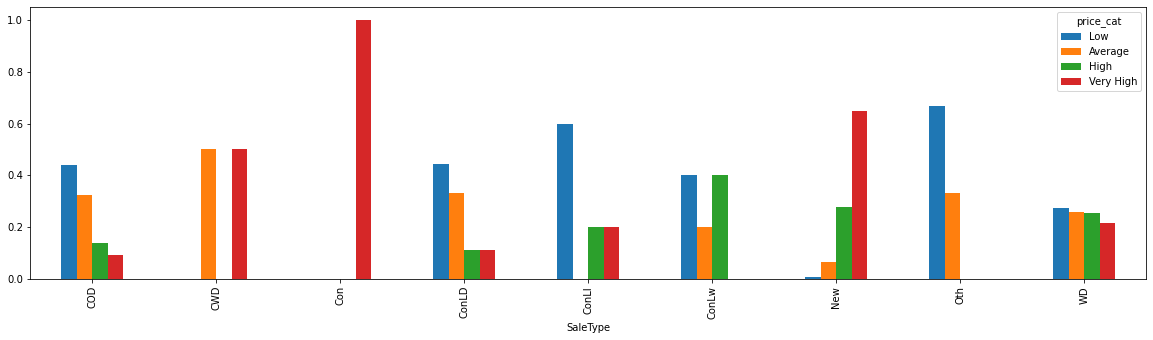

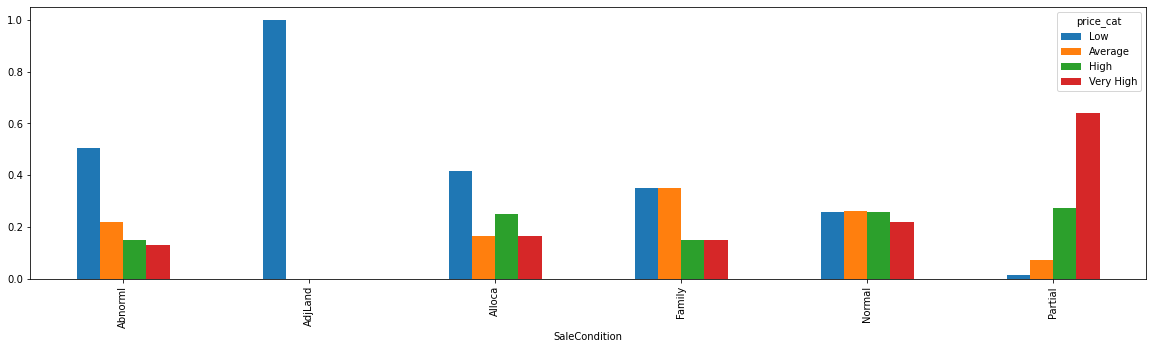

In [ ]:
for col in categorical_df_1:
    price_bin=pd.crosstab(categorical_df[col], price_cat) 
    price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(20, 5)) 
plt.show()

### Continuous variables visualization 

In [ ]:
 numerical_df.drop('Id', 1, inplace=True)

Histograms for the numeric variable 

<function matplotlib.pyplot.show(*args, **kw)>

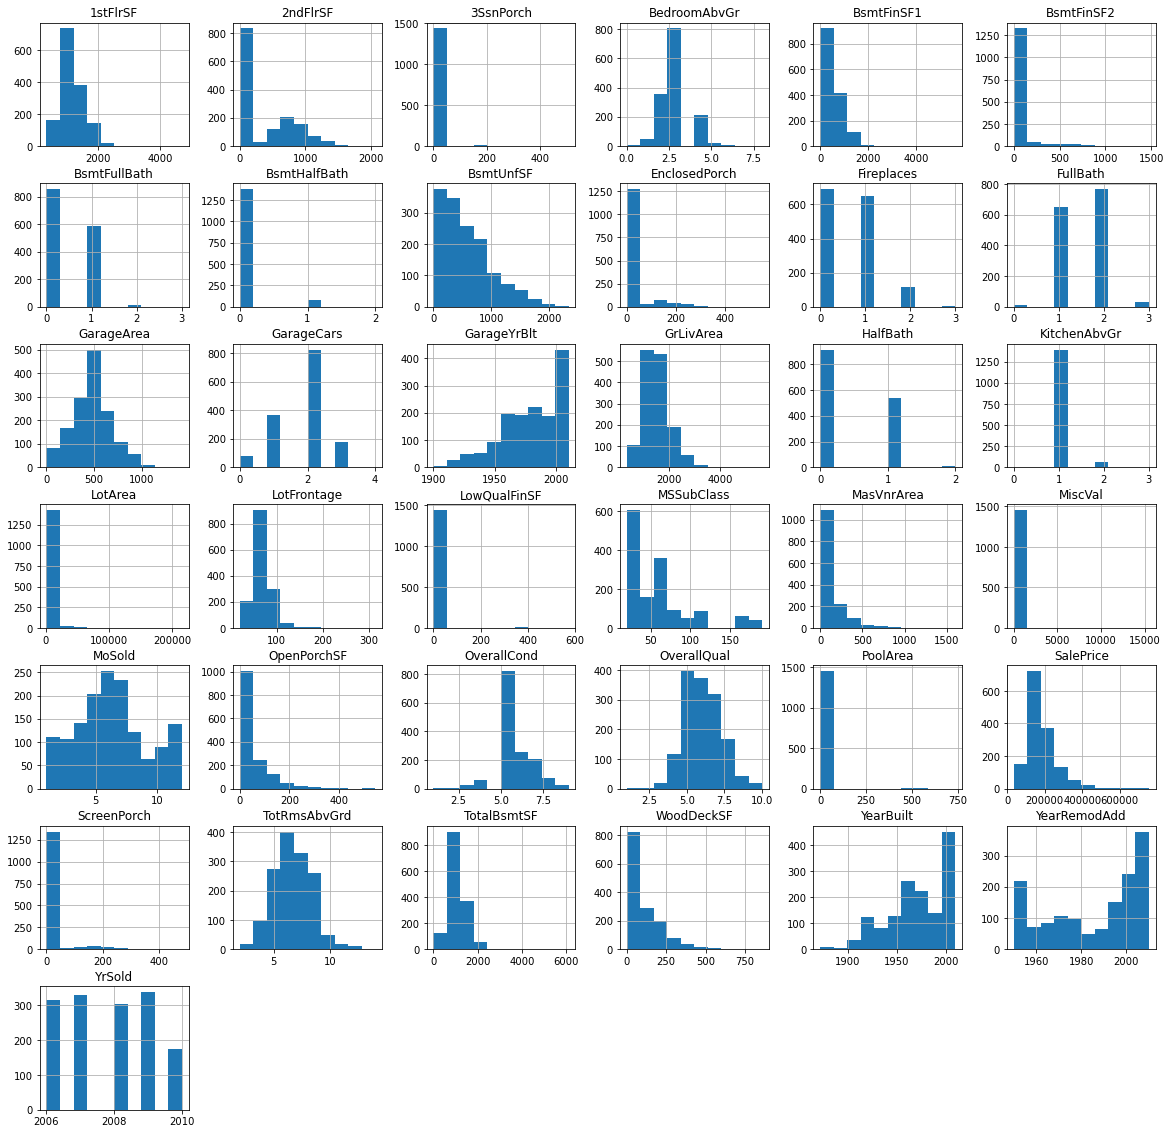

In [ ]:
numerical_df.hist(figsize=(20,20))
plt.show

Density plots 

<function matplotlib.pyplot.show(*args, **kw)>

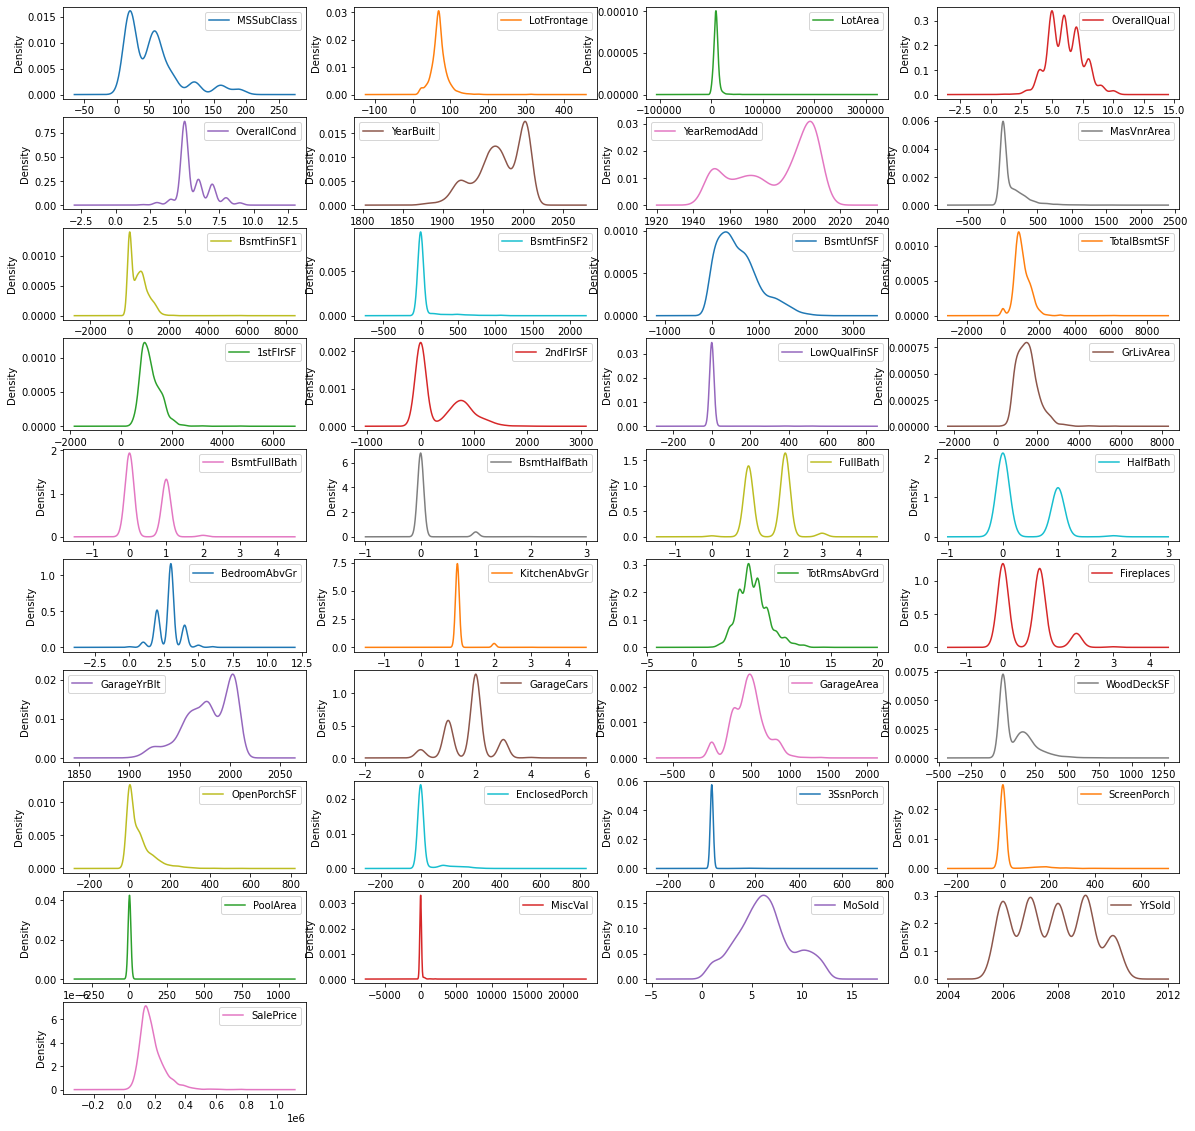

In [ ]:
numerical_df.plot(kind='density', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

Box Plots 

<function matplotlib.pyplot.show(*args, **kw)>

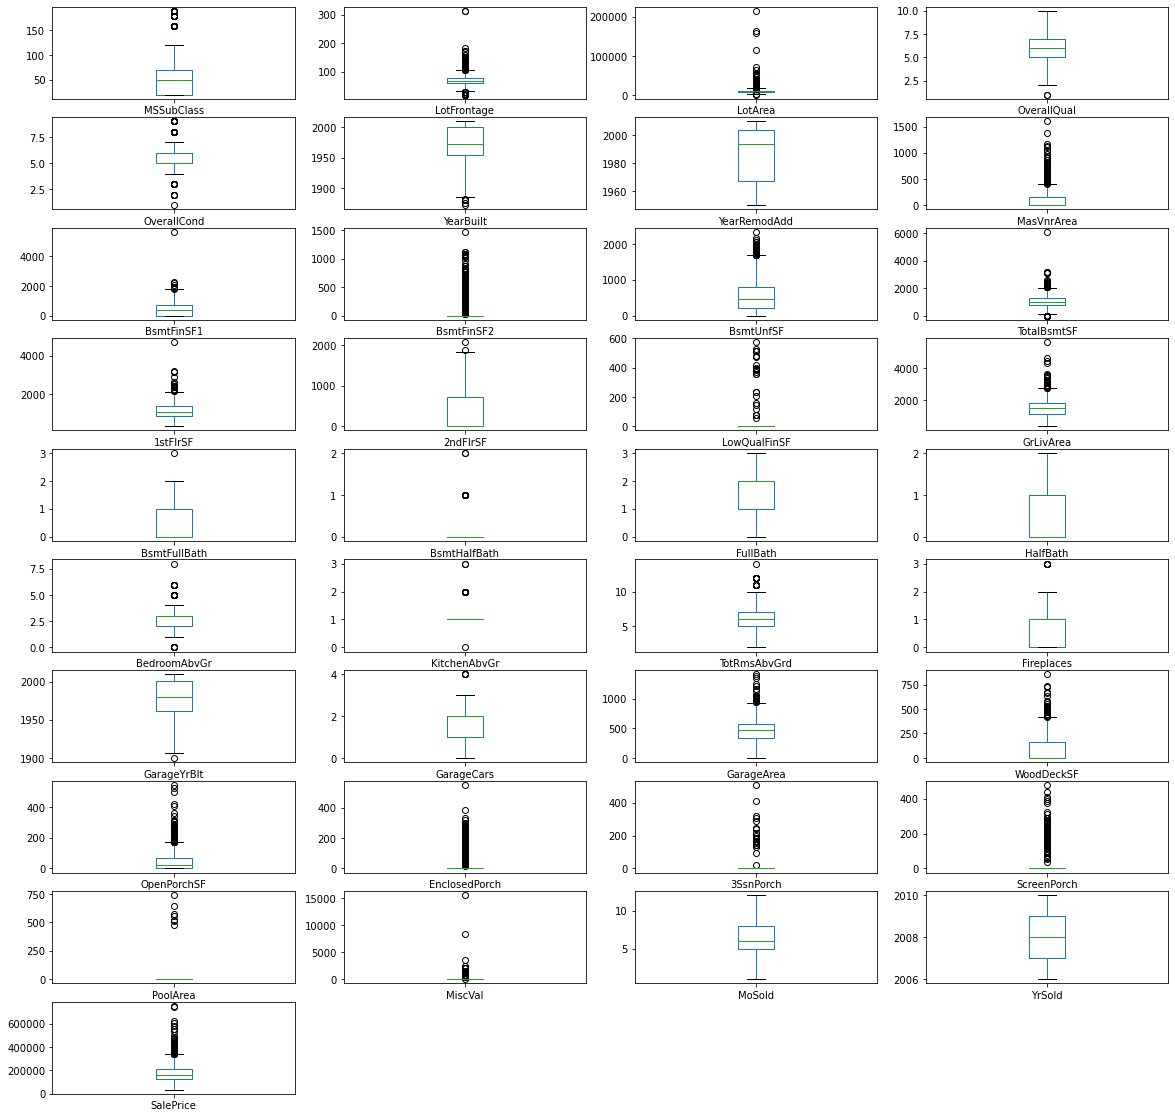

In [ ]:
numerical_df.plot(kind='box', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

In [ ]:
import plotly.express as px

In [ ]:
matrix=numerical_df.corr()
matrix.round(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.36    -0.14         0.03        -0.06   
LotFrontage         -0.36         1.00     0.30         0.23        -0.05   
LotArea             -0.14         0.30     1.00         0.11        -0.01   
OverallQual          0.03         0.23     0.11         1.00        -0.09   
OverallCond         -0.06        -0.05    -0.01        -0.09         1.00   
YearBuilt            0.03         0.12     0.01         0.57        -0.38   
YearRemodAdd         0.04         0.08     0.01         0.55         0.07   
MasVnrArea           0.02         0.18     0.10         0.41        -0.13   
BsmtFinSF1          -0.07         0.21     0.21         0.24        -0.05   
BsmtFinSF2          -0.07         0.04     0.11        -0.06         0.04   
BsmtUnfSF           -0.14         0.12    -0.00         0.31        -0.14   
TotalBsmtSF         -0.24         0.36     0.26         0.54        -0.17   
1stFlrSF            -0.25         0.41     0.30         0.48        -0.14   
2ndFlrSF             0.31         0.07     0.05         0.30         0.03   
LowQualFinSF         0.05         0.04     0.00        -0.03         0.03   
GrLivArea            0.07         0.37     0.26         0.59        -0.08   
BsmtFullBath         0.00         0.09     0.16         0.11        -0.05   
BsmtHalfBath        -0.00        -0.01     0.05        -0.04         0.12   
FullBath             0.13         0.18     0.13         0.55        -0.19   
HalfBath             0.18         0.05     0.01         0.27        -0.06   
BedroomAbvGr        -0.02         0.24     0.12         0.10         0.01   
KitchenAbvGr         0.28        -0.00    -0.02        -0.18        -0.09   
TotRmsAbvGrd         0.04         0.32     0.19         0.43        -0.06   
Fireplaces          -0.05         0.23     0.27         0.40        -0.02   
GarageYrBlt          0.08         0.06    -0.03         0.51        -0.31   
GarageCars          -0.04         0.27     0.15         0.60        -0.19   
GarageArea          -0.10         0.32     0.18         0.56        -0.15   
WoodDeckSF          -0.01         0.08     0.17         0.24        -0.00   
OpenPorchSF         -0.01         0.14     0.08         0.31        -0.03   
EnclosedPorch       -0.01         0.01    -0.02        -0.11         0.07   
3SsnPorch           -0.04         0.06     0.02         0.03         0.03   
ScreenPorch         -0.03         0.04     0.04         0.06         0.05   
PoolArea             0.01         0.18     0.08         0.07        -0.00   
MiscVal             -0.01        -0.00     0.04        -0.03         0.07   
MoSold              -0.01         0.01     0.00         0.07        -0.00   
YrSold              -0.02         0.01    -0.01        -0.03         0.04   
SalePrice           -0.08         0.33     0.26         0.79        -0.08   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.03          0.04        0.02       -0.07       -0.07   
LotFrontage         0.12          0.08        0.18        0.21        0.04   
LotArea             0.01          0.01        0.10        0.21        0.11   
OverallQual         0.57          0.55        0.41        0.24       -0.06   
OverallCond        -0.38          0.07       -0.13       -0.05        0.04   
YearBuilt           1.00          0.59        0.31        0.25       -0.05   
YearRemodAdd        0.59          1.00        0.18        0.13       -0.07   
MasVnrArea          0.31          0.18        1.00        0.26       -0.07   
BsmtFinSF1          0.25          0.13        0.26        1.00       -0.05   
BsmtFinSF2         -0.05         -0.07       -0.07       -0.05        1.00   
BsmtUnfSF           0.15          0.18        0.11       -0.50       -0.21   
TotalBsmtSF         0.39          0.29        0.36        0.52        0.10   
1stFlrSF            0.28          0.24        0.34        0.45        0.10

In [ ]:
px.imshow(matrix.round(2), width=1000, height=1000)

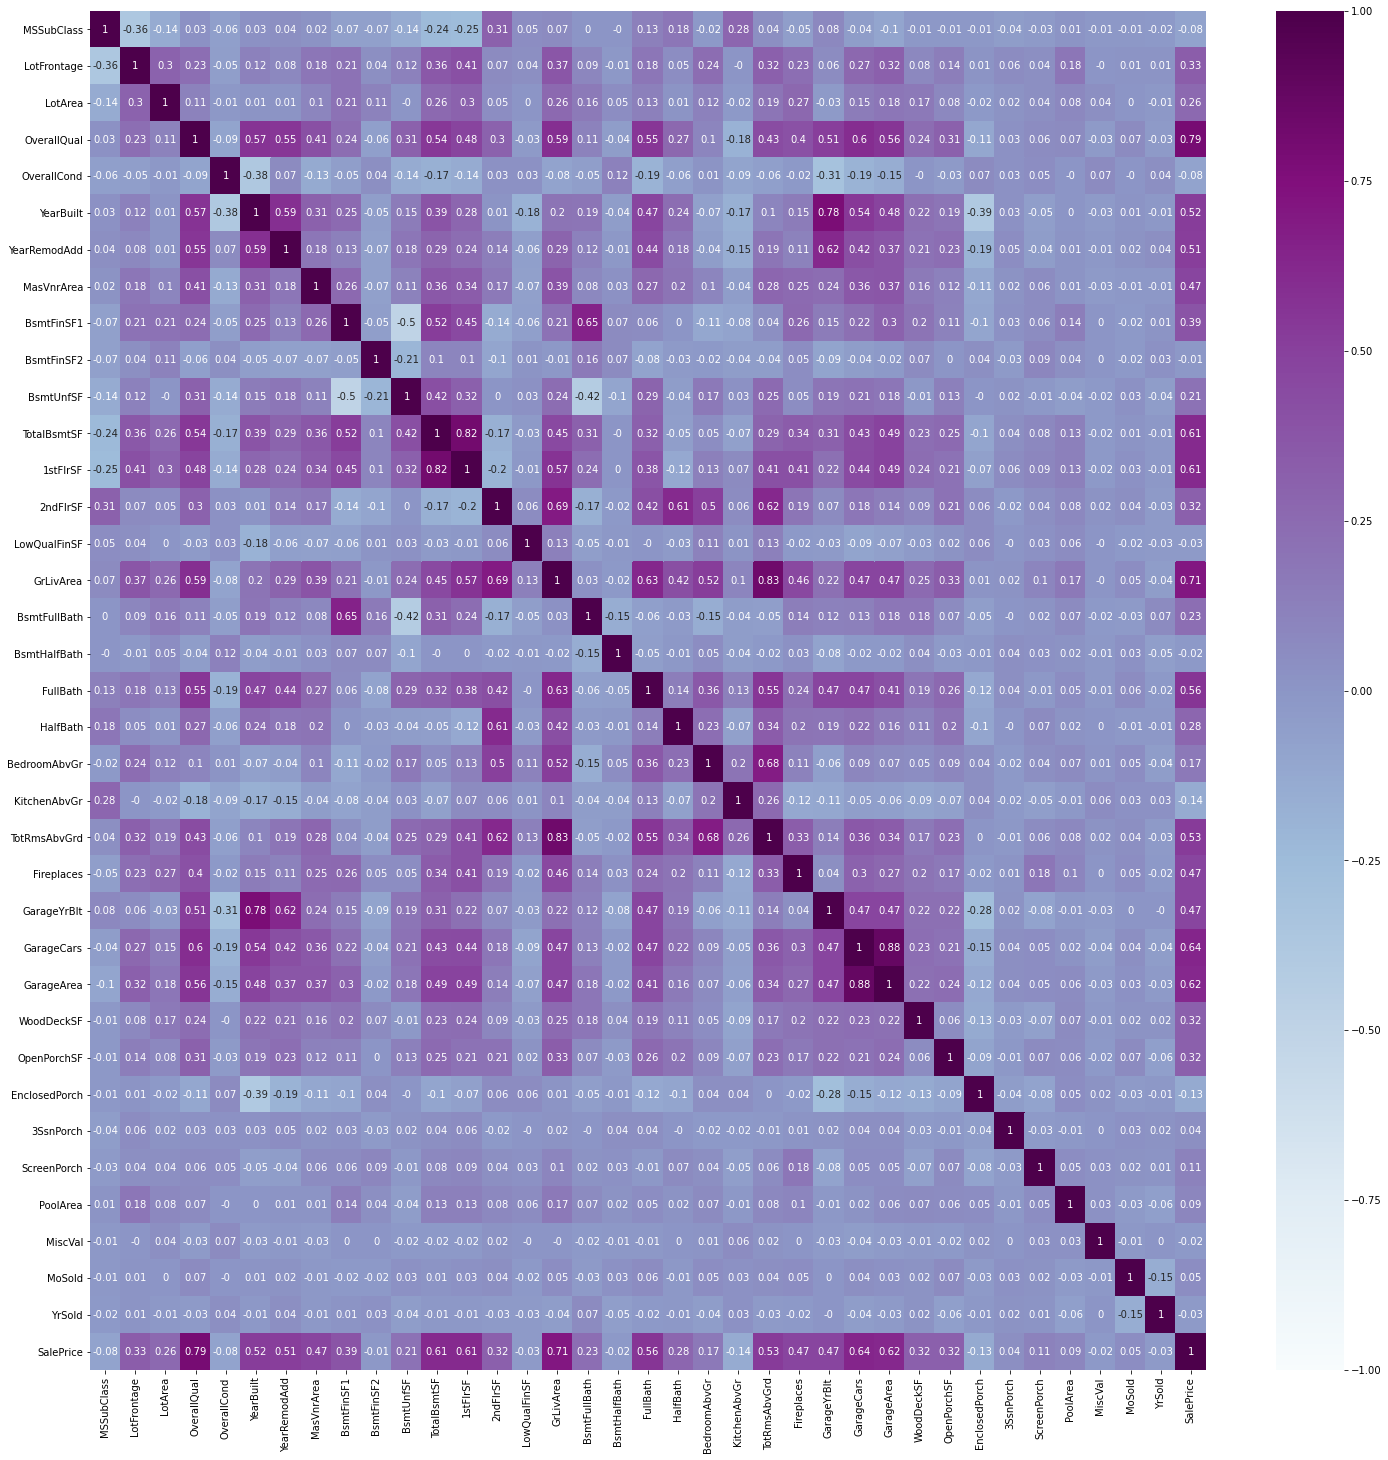

In [ ]:
fig = plt.figure(figsize = (25,25))
sns.heatmap(matrix.round(2), vmax=1, vmin=-1, cmap='BuPu',annot=True)

## STATISTICS

In [ ]:
import pingouin as pg

### T-Test

saleprice by street

In [ ]:
Street_Pave = train_data.SalePrice[train_data.Street=='Pave']
Street_Gravel = train_data.SalePrice[train_data.Street=='Grvl']
print('mean difference: {:.4f}'.format(Street_Pave.mean()-Street_Gravel.mean()))
result=pg.ttest(Street_Pave,Street_Gravel,correction='auto')
display(result)

mean difference: 50940.0385


T       dof       tail     p-val                   CI95%  \
T-test  1.900788  5.060993  two-sided  0.115048  [-17701.13, 119581.21]   

        cohen-d   BF10     power  
T-test  0.64154  1.406  0.347449

Utilities_A = train_data.SalePrice[train_data.Utilities=='AllPub']
Utilities_N = train_data.SalePrice[train_data.Utilities=='NoSeWa']
print('mean difference: {:.4f}'.format(Utilities_A.mean() - Utilities_N.mean()))
res = pg.ttest(Utilities_A, Utilities_N)
display(res)

### Anova Test

salePrice by PavedDrive

In [ ]:
train_data.groupby('PavedDrive')['SalePrice'].mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186433.973881
Name: SalePrice, dtype: float64

In [ ]:
aov = pg.anova(data=train_data, dv='SalePrice', between='PavedDrive', detailed=True)
aov

Source            SS    DF            MS          F         p-unc  \
0  PavedDrive  5.021970e+11     2  2.510985e+11  42.024179  1.803569e-18   
1      Within  8.705714e+12  1457  5.975096e+09        NaN           NaN   

       np2  
0  0.05454  
1      NaN

pairwise comparison

In [ ]:
pt = pg.pairwise_tukey(data=train_data, dv='SalePrice', between='PavedDrive')
pt

A  B        mean(A)        mean(B)          diff            se         T  \
0  N  P  115039.122222  132330.000000 -17290.877778  16296.005841 -1.061050   
1  N  Y  115039.122222  186433.973881 -71394.851658   8417.183507 -8.482036   
2  P  Y  132330.000000  186433.973881 -54103.973881  14269.859192 -3.791486   

    p-tukey    hedges  
0  0.536672 -0.222264  
1  0.001000 -0.923137  
2  0.001000 -0.699550

SalePrice by Salecondition

In [ ]:
train_data.groupby('SaleCondition')['SalePrice'].mean()

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

anova test

In [ ]:
aov = pg.anova(data=train_data, dv='SalePrice', between='SaleCondition', detailed=True)
aov

Source            SS    DF            MS          F         p-unc  \
0  SaleCondition  1.247649e+12     5  2.495298e+11  45.578428  7.988268e-44   
1         Within  7.960263e+12  1454  5.474734e+09        NaN           NaN   

        np2  
0  0.135497  
1       NaN

pairwise comparison

In [ ]:
pt = pg.pairwise_tukey(data=train_data, dv='SalePrice', between='SaleCondition')
pt

A        B        mean(A)        mean(B)           diff  \
0   Abnorml  AdjLand  146526.623762  104125.000000   42401.623762   
1   Abnorml   Alloca  146526.623762  167377.416667  -20850.792904   
2   Abnorml   Family  146526.623762  149600.000000   -3073.376238   
3   Abnorml   Normal  146526.623762  175202.219533  -28675.595770   
4   Abnorml  Partial  146526.623762  272291.752000 -125765.128238   
5   AdjLand   Alloca  104125.000000  167377.416667  -63252.416667   
6   AdjLand   Family  104125.000000  149600.000000  -45475.000000   
7   AdjLand   Normal  104125.000000  175202.219533  -71077.219533   
8   AdjLand  Partial  104125.000000  272291.752000 -168166.752000   
9    Alloca   Family  167377.416667  149600.000000   17777.416667   
10   Alloca   Normal  167377.416667  175202.219533   -7824.802866   
11   Alloca  Partial  167377.416667  272291.752000 -104914.335333   
12   Family   Normal  149600.000000  175202.219533  -25602.219533   
13   Family  Partial  149600.000000  272291.752000 -122691.752000   
14   Normal  Partial  175202.219533  272291.752000  -97089.532467   

              se          T   p-tukey    hedges  
0   37721.196563   1.124079  0.859588  0.568878  
1   22592.766066  -0.922897  0.900000 -0.279892  
2   18109.167849  -0.169714  0.900000 -0.041275  
3    7666.497057  -3.740378  0.002622 -0.387329  
4    9899.654088 -12.703992  0.001000 -1.694028  
5   42718.979193  -1.480663  0.653858 -0.808232  
6   40526.782070  -1.122097  0.860730 -0.593405  
7   37057.432209  -1.918029  0.392926 -0.960014  
8   37582.991577  -4.474544  0.001000 -2.259338  
9   27017.854713   0.657988  0.900000  0.234206  
10  21466.198785  -0.364517  0.900000 -0.105687  
11  22361.253637  -4.691791  0.001000 -1.410033  
12  16682.522949  -1.534673  0.622697 -0.345802  
13  17819.499036  -6.885253  0.001000 -1.649476  
14   6954.693584 -13.960289  0.001000 -1.311427

### Machine learning 

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRFRegressor

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_df.drop('price_cat', 1, inplace=True)


In [ ]:
categorical_df.drop('SalePrice', 1, inplace=True)

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_df:
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        test_data[col] = le.transform(test_data[col].astype(str))
    print (train_data.info())
    
encode()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
train_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           2   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           2   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             5           0   
1             1             0         978             5           0   
2             2             2         486             5           0   
3             3             0         216             5           0   
4             0             2         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           4   
1        284         1262        1          0           1           4   
2        434          920        1          0           1           4   
3        540          756        1          2           1           4   
4        490         1145        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1    

In [ ]:
test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         2         80.0    11622       1         3   
1  1462          20         3         81.0    14267       1         0   
2  1463          60         3         74.0    13830       1         0   
3  1464          60         3         78.0     9978       1         0   
4  1465         120         3         43.0     5005       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   
3            3          0          4          0             8           2   
4            1          0          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            5            6       1961   
1           2         0           2            6            6       1958   
2           2         0           5            5            5       1997   
3           2         0           5            6            6       1998   
4           2         4           2            8            5       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         1           12           13           2   
1          1958          3         1           13           14           1   
2          1998          1         1           12           13           2   
3          1998          1         1           12           13           1   
4          1992          1         1            6            6           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         3         3   
1       108.0          3          4           1         3         3   
2         0.0          3          4           2         2         3   
3        20.0          3          4           2         3         3   
4         0.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             4       468.0             3       144.0   
1             3             0       923.0             5         0.0   
2             3             2       791.0             5         0.0   
3             3             2       602.0             5         0.0   
4             3             0       263.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        1          4           1           4   
1      406.0       1329.0        1          4           1           4   
2      137.0        928.0        1          2           1           4   
3      324.0        926.0        1          0           1           4   
4     1017.0       1280.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             5   
1         1         1             3             1            2             6   
2         2         1             3             1            3             6   
3         2         1             3             1            2             7   
4         2    

### Split the data.

In [ ]:
X = train_data.drop(['Id', 'SalePrice'], 1)
y = train_data.SalePrice
test_data = test_data.drop('Id', 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 74), (1022,), (438, 74), (438,))

#### Training machine learning models. 

Linear Regression

In [ ]:
LinReg = LinearRegression().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LinReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LinReg.score(X_test, y_test)))

R-squared of the training: 0.839
R-squared of the test: 0.837


In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
SalePrice_predicted = LinReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 34079.772


Ridge Regression

In [ ]:
RidgeReg = Ridge().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RidgeReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RidgeReg.score(X_test, y_test)))

R-squared of the training: 0.839
R-squared of the test: 0.838


In [ ]:
SalePrice_predicted = RidgeReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 34035.936


Lasso Regression

In [ ]:
LassoReg = Lasso().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LassoReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LassoReg.score(X_test, y_test)))

R-squared of the training: 0.839
R-squared of the test: 0.837


In [ ]:
SalePrice_predicted = LassoReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 34078.037


Decision Tree Regression

In [ ]:
DTReg = DecisionTreeRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(DTReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(DTReg.score(X_test, y_test)))

R-squared of the training: 1.000
R-squared of the test: 0.799


In [ ]:
SalePrice_predicted = DTReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 37909.599


Random Forest Regression

In [ ]:
RFReg = RandomForestRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RFReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RFReg.score(X_test, y_test)))

R-squared of the training: 0.975
R-squared of the test: 0.903


In [ ]:
SalePrice_predicted = RFReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 26362.505


Bagging Regression

In [ ]:
BReg = BaggingRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(BReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(BReg.score(X_test, y_test)))

R-squared of the training: 0.967
R-squared of the test: 0.899


In [ ]:
SalePrice_predicted = BReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 26799.882


Adaboost regression

In [ ]:
AReg = AdaBoostRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(AReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(AReg.score(X_test, y_test)))

R-squared of the training: 0.879
R-squared of the test: 0.848


In [ ]:
SalePrice_predicted = AReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 32988.008


Gradient Boost Regression

In [ ]:
GBReg = GradientBoostingRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(GBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg.score(X_test, y_test)))

R-squared of the training: 0.968
R-squared of the test: 0.925


In [ ]:
SalePrice_predicted = GBReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 23180.555


XGB Regression

In [ ]:
XGBReg = XGBRFRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(XGBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(XGBReg.score(X_test, y_test)))

R-squared of the training: 0.948
R-squared of the test: 0.896


In [ ]:
SalePrice_predicted = XGBReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 27311.237


In [ ]:
np.set_printoptions(precision=2)
y_pred = GBReg.predict(X_train)
pred = np.concatenate(( y_pred, y_test),0)
pred.shape

(1460,)

In [ ]:
#GETTING ACCURACY
from sklearn.metrics import r2_score
y_pred = GBReg.predict(X_test)
print(r2_score(y_test, y_pred))

0.9247457478086359


In [ ]:
test_pred = test_data.copy()
prediction = GBReg.predict(test_pred)